In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import copy

font_path = "C:/Windows/Fonts/MALGUN.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('xtick', labelsize=10)
mpl.rcParams['axes.unicode_minus'] = False

In [296]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("test.csv")
age = pd.read_csv("age_gender_info.csv")
rent_deposit = pd.read_csv("predicted_rent_deposit.csv")

In [297]:
train.shape, test.shape, rent_deposit.shape

((2952, 15), (1022, 14), (767, 2))

In [298]:
print(len(train['단지코드'].unique()))

423


In [299]:
print(len(train['등록차량수'].unique()))

354


In [300]:
train.head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0


In [301]:
# 오류1번 트레인 셋 처리
# 총세대수와 전용면적별 세대수 합이 다른 단지코드의 값을 -> 전용면적별세대수의 합으로 수정하기

def house_number_correction(df):
    error_1_group = df.groupby("단지코드")[["총세대수"]]
    total_number_house_hold = error_1_group.mean()

    error_2_group = df.groupby("단지코드")["전용면적별세대수"]
    sum_house_hold = error_2_group.sum()

    check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
    different_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

    total_house_index = different_df.index
    total_house_number = []
    for v in different_df.values:
        total_house_number.append(v[1])
    
    for code, value in zip(total_house_index, total_house_number):
         df.loc[df["단지코드"] == code, "총세대수"] = value
    
    return df

train = house_number_correction(train)
test = house_number_correction(test)

In [302]:
print(len(train['단지코드'].unique()))

423


In [303]:
print(len(train['등록차량수'].unique()))

354


In [304]:
error_1_group = train.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = train.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

print(check_df.shape)
check_df

(0, 2)


,총세대수,전용면적별세대수
단지코드,,


In [305]:
error_1_group = test.groupby("단지코드")[["총세대수"]]
total_number_house_hold = error_1_group.mean()

error_2_group = test.groupby("단지코드")["전용면적별세대수"]
sum_house_hold = error_2_group.sum()

check_df = pd.concat([total_number_house_hold, sum_house_hold], axis=1)
check_df = check_df[check_df["총세대수"] != check_df["전용면적별세대수"]]

check_df.shape

(0, 2)

In [306]:
# 오류2번 3번 처리하기

train[(train["단지코드"] == "C2675") | (train["단지코드"] == "C2335") | (train["단지코드"] == "C1327")]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [307]:
test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
579,C2675,512,아파트,경기도,국민임대,36.65,130,9.0,A,18476000,154790,0.0,3.0,1016.0
580,C2675,512,아파트,경기도,국민임대,46.90,44,9.0,A,34082000,232200,0.0,3.0,1016.0
581,C2675,512,아파트,경기도,국민임대,46.90,80,9.0,A,34082000,232200,0.0,3.0,1016.0
582,C2675,512,아파트,경기도,국민임대,46.90,50,9.0,A,34082000,232200,0.0,3.0,1016.0
583,C2675,512,아파트,경기도,국민임대,46.90,88,9.0,A,34082000,232200,0.0,3.0,1016.0


In [308]:
# 테스트 데이터 셋에서 세개의 코드 데이터를 없애기 (2, 3번 3개 코드 제거)

error_index = test[(test["단지코드"] == "C2675") | (test["단지코드"] == "C2335") | (test["단지코드"] == "C1327")].index
test = test.drop(index=error_index, axis=0)

In [309]:
# 에러2번의 5개 단지코드 트레인 셋 제거

train_set_error_index = train[(train["단지코드"] =="C2085") | (train["단지코드"] =="C1397") | (train["단지코드"] =="C2431") | (train["단지코드"] =="C1649") | (train["단지코드"] =="C1036")].index
train = train.drop(index=train_set_error_index, axis=0)

In [310]:
# 에러3번의 트레인 셋 7개 단지 코드 제거

train_set_error_index = train[(train["단지코드"] =="C1095") | (train["단지코드"] =="C2051") | (train["단지코드"] =="C1218") | (train["단지코드"] =="C1894") | (train["단지코드"] =="C2483") | (train["단지코드"] =="C1502") | (train["단지코드"] =="C1988")].index
train = train.drop(index=train_set_error_index, axis=0)

#### 결측치인 196,258행을 보면 다른 피처들을 비교하여 보았을 때, 196은 자격유형이 A라고 예측이 되었고, 258은 C라고 예측이 된다.

In [311]:
# 자격 유형 피처 전처리

test.loc[196, "자격유형"] = "A"
test.loc[258, "자격유형"] = "C"
test.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     38
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [312]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    207
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

#### 임대보증금은 - 와 결측치로 매꿔져 있는 값을 0으로 변환후 저희가 따로 에측한 임대보증금 값을 인덱스로 맞춰 연결

In [313]:
# 임대보증금 피처 전처리
# 임대보증금이 0인 행의 데이터를 -> 트레인 셋의 지역별 평균 값으로 치환
train_df = train.copy(deep=True)
test_df = test.copy(deep=True)

train_df["임대보증금"] = train_df["임대보증금"].fillna(0)
train_df.loc[train_df["임대보증금"] == "-", "임대보증금"] = 0
train_df["임대보증금"] = train_df["임대보증금"].astype(int)

test_df["임대보증금"] = test_df["임대보증금"].fillna(0)
test_df.loc[test_df["임대보증금"] == "-", "임대보증금"] = 0
test_df["임대보증금"] = test_df["임대보증금"].astype(int)

In [314]:
train_df.index

Int64Index([   8,    9,   10,   11,   12,   13,   14,   15,   16,   17,
            ...
            2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950, 2951],
           dtype='int64', length=2869)

In [315]:
test_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021],
           dtype='int64', length=1008)

In [316]:
train_df[train_df["임대보증금"] == 0].index

Int64Index([  88,   89,   90,   91,  101,  102,  103,  104,  105,  106,
            ...
            2549, 2550, 2551, 2680, 2681, 2682, 2683, 2906, 2907, 2908],
           dtype='int64', length=581)

In [317]:
test_df[test_df["임대보증금"] == 0].index

Int64Index([  76,   77,   79,   80,   81,   82,   83,   84,   85,   86,
            ...
             329,  330,  331,  332, 1005, 1006, 1014, 1015, 1016, 1017],
           dtype='int64', length=186)

In [318]:
rent_deposit.iloc[581]

index          76.0
임대보증금    11258525.0
Name: 581, dtype: float64

In [319]:
train_rent_deposit = rent_deposit.iloc[:581]
test_rent_deposit = rent_deposit.iloc[581:]

In [320]:
train_rent_deposit

,index,임대보증금
0,88,8491325.0
1,89,8491325.0
2,90,8491325.0
3,91,19519700.0
4,101,8695225.0
...,...,...
576,2682,30870825.0
577,2683,30870825.0
578,2906,7425500.0
579,2907,7554775.0


##### set_index를 이용하여 인덱스를 바꿔줌

In [321]:
train_rent_deposit = train_rent_deposit.set_index("index")
test_rent_deposit = test_rent_deposit.set_index("index")

In [322]:
train_rent_deposit

,임대보증금
index,
88,8491325.0
89,8491325.0
90,8491325.0
91,19519700.0
101,8695225.0
...,...
2682,30870825.0
2683,30870825.0
2906,7425500.0


In [323]:
train_df.loc[train_rent_deposit.index, "임대보증금"] = train_rent_deposit["임대보증금"]
test_df.loc[test_rent_deposit.index, "임대보증금"] = test_rent_deposit["임대보증금"]

In [324]:
train_df[train_df["임대보증금"] == 0]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [325]:
test_df[test_df["임대보증금"] == 0]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수


In [326]:
train_df["임대보증금"].isnull().sum()

0

In [327]:
test_df["임대보증금"].isnull().sum()

0

<AxesSubplot:>

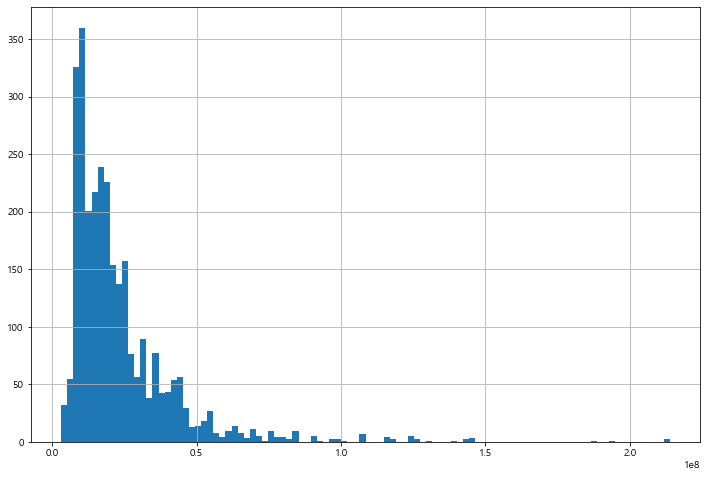

In [328]:
train_df["임대보증금"].hist(bins=100, figsize=(12, 8))

In [329]:
train_df["임대보증금"].value_counts()

24775000.0    22
14418000.0    21
9364600.0     20
5787000.0     18
18726000.0    17
              ..
50000000.0     1
19223000.0     1
13155000.0     1
28407000.0     1
27263000.0     1
Name: 임대보증금, Length: 1098, dtype: int64

In [330]:
train_df["임대보증금"].skew() #왜도 0보다 크니깐 왼쪽으로 치우쳐진 것입니다.

3.36460878202262

In [331]:
train_df["임대보증금"].kurt() #첨도 0보다 크니깐 위로 뾰족한 정도가 크다는 의미.

18.758347504146197

In [332]:
train.head(2)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0


#### 원핫 인코딩으로 전환 > 카테고리 피처이기 때문에 숫자형으로 바꿔 컴퓨터가 인식할 수 있도록 해준 것.

In [333]:
# 레이블 인코딩인데, 원핫 인코딩으로 바꿔보기( pd.get_dummies범주형인 자격유형을 수치형으로 전환 해준 것)

qualification_type_feature = pd.get_dummies(train_df["자격유형"])
train_df = pd.concat([train_df, qualification_type_feature], axis=1)

qualification_type_feature = pd.get_dummies(test_df["자격유형"])
test_df = pd.concat([test_df, qualification_type_feature], axis=1)

test_df["B"] = 0
test_df["F"] = 0
test_df["O"] = 0

In [334]:
train['자격유형'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [335]:
test_df['자격유형'].unique()

array(['H', 'A', 'E', 'C', 'D', 'G', 'I', 'J', 'K', 'L', 'M', 'N'],
      dtype=object)

In [336]:
train_df.shape, test_df.shape

((2869, 30), (1008, 29))

In [337]:
pd.options.display.max_columns=None

In [338]:
test_df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,A,C,D,E,G,H,I,J,K,L,M,N,B,F,O
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000.0,189840,0.0,2.0,683.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000.0,249930,0.0,2.0,683.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000.0,249930,0.0,2.0,683.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000.0,249930,0.0,2.0,683.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000.0,296780,0.0,2.0,683.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [339]:
# 실거주 세대수 피처 생성

train_df["실거주세대수"] = train_df["총세대수"] - train_df["공가수"].astype(int)
test_df["실거주세대수"] = test_df["총세대수"] - test_df["공가수"].astype(int)

In [340]:
# 세대수 별 주차면수 피처 생성

train_df["세대수비율주차면수"] = (train_df["전용면적별세대수"] / train_df["실거주세대수"]) * train_df["단지내주차면수"]
test_df["세대수비율주차면수"] = (test_df["전용면적별세대수"] / test_df["실거주세대수"]) * test_df["단지내주차면수"]

In [341]:
train_df.head(2)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,실거주세대수,세대수비율주차면수
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940,0.0,3.0,624.0,205.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,528,326.181818
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130,0.0,3.0,624.0,205.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,528,70.909091


#### 버스정류장은 최빈값인 2로 전처리 함.

In [342]:
# 버스정류장 피처 전처리
# 최빈값인 2로 채우기

train_df["도보 10분거리 내 버스정류장 수"] = train_df["도보 10분거리 내 버스정류장 수"].fillna(2)
test_df["도보 10분거리 내 버스정류장 수"] = test_df["도보 10분거리 내 버스정류장 수"].fillna(2)

#### 전철역도 최빈값인 0으로 전처리함.

In [343]:
# 전철역 피처 전처리
# Null 값 0으로 채우기

train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)
test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"] = test_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"].fillna(0)

<AxesSubplot:>

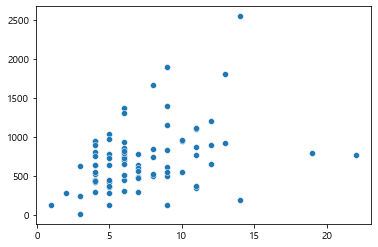

In [344]:
area_group = train_df.groupby("지역")["등록차량수"]

values = area_group.get_group("경기도").value_counts().index
counts = area_group.get_group("경기도").value_counts().values

sns.scatterplot(x=counts, y=values)

In [345]:
# 지역별 인구수 컬럼 추가

# population_df = pd.read_csv("../data/dacon_parking_demand_dataset/age_gender_info.csv")
# partial_population_df = population_df[["20대(남자)", "40대(남자)", "50대(여자)", "지역"]]
# train_df = pd.merge(train_df, partial_population_df, on="지역")
# test_df = pd.merge(test_df, partial_population_df, on="지역")

# train_df.columns

#### 지역 피처 원핫인코딩

In [346]:
# 지역 피처 원핫 인코딩

area_df = pd.get_dummies(train_df["지역"])
area_df = area_df.drop("서울특별시", axis=1)
train_df = pd.concat([train_df, area_df], axis=1)

area_df = pd.get_dummies(test_df["지역"])
test_df = pd.concat([test_df, area_df], axis=1)

In [347]:
train_df[train_df["단지코드"] == "C1039"]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,실거주세대수,세대수비율주차면수,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000.0,-,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,109.135135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000.0,-,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,42.441441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000.0,-,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,64.961390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2103,C1039,790,아파트,서울특별시,국민임대,26.68,26,13.0,A,15282000.0,190620,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,22.519949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2104,C1039,790,아파트,서울특별시,국민임대,36.70,140,13.0,A,21024000.0,256040,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,121.261261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2105,C1039,790,아파트,서울특별시,국민임대,36.70,14,13.0,A,21024000.0,256040,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,12.126126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2106,C1039,790,아파트,서울특별시,국민임대,36.87,43,13.0,A,21024000.0,256040,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,37.244530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2107,C1039,790,아파트,서울특별시,국민임대,46.76,192,13.0,A,45456000.0,356420,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,166.301158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2108,C1039,790,아파트,서울특별시,국민임대,46.96,25,13.0,A,45456000.0,356420,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,21.653797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2109,C1039,790,아파트,서울특별시,영구임대,26.68,70,13.0,I,11490000.0,94820,0.0,3.0,673.0,645.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,777,60.630631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 인대건물 원핫 인코딩

In [348]:
# 임대건물 구분 피처 전처리 (아파트, 상가 원핫 인코딩)

train_df = pd.concat([train_df, pd.get_dummies(train_df["임대건물구분"])], axis=1)
train_df.drop("임대건물구분", axis=1, inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df["임대건물구분"])], axis=1)
test_df.drop("임대건물구분", axis=1, inplace=True)

#### 전용면적 피처들을 보면 float형식으로 되어있어, overflow발생가능성이 있어 그 현상을 없애기 위해 5의 배수로 전처리 해준 것.

In [349]:
# 전용 면적 피처를 5의 배수로 전처리, 전후로 비교해서 (103.69 -> 102.80까지 떨어짐)
#Overflow라고 해서 소수점 아래 자리가 계속해서 늘어나면서 값이 불분명하게 되는 현상이 발생할 수 있다.
train_df["전용면적"] = train_df["전용면적"] // 5*5
test_df["전용면적"] = test_df["전용면적"] // 5*5

#### 세대수 규모 당 면적 피처 생성

In [350]:
# 세대수 규모 당 총 전용 면적 피처 생성

train_df["세대수 규모 당 총 전용면적"] = train_df["전용면적"] * train_df["전용면적별세대수"]
test_df["세대수 규모 당 총 전용면적"] = test_df["전용면적"] * test_df["전용면적별세대수"]

#### 단지별 총 전용 면적 피처 생성

In [351]:
# 단지별 총 전용 면적 피처 생성

train_df["단지별 총 전용면적"] = train_df.groupby("단지코드")["세대수 규모 당 총 전용면적"].transform(np.sum)
test_df["단지별 총 전용면적"] = test_df.groupby("단지코드")["세대수 규모 당 총 전용면적"].transform(np.sum)

#### 전용면적 당 차량등록수 피처 생성

In [352]:
# 전용면적 당 차량등록수 피처 생성

train_df["전용면적 당 차량등록수"] = (train_df["세대수 규모 당 총 전용면적"] / train_df["단지별 총 전용면적"]) * train_df["등록차량수"]

In [353]:
train_df["공급유형"].value_counts()

국민임대         1727
임대상가          562
행복주택          202
공공임대(10년)     175
영구임대          152
공공임대(50년)      31
공공임대(분납)        7
공공분양            7
공공임대(5년)        3
장기전세            3
Name: 공급유형, dtype: int64

In [354]:
train_df[train_df["공급유형"] == "장기전세"]

,단지코드,총세대수,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,실거주세대수,세대수비율주차면수,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,상가,아파트,세대수 규모 당 총 전용면적,단지별 총 전용면적,전용면적 당 차량등록수
2100,C1039,790,서울특별시,장기전세,50.0,126,13.0,A,187694000.0,-,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,109.135135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6300.0,33080.0,122.838573
2101,C1039,790,서울특별시,장기전세,55.0,49,13.0,A,213863000.0,-,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,42.441441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2695.0,33080.0,52.547612
2102,C1039,790,서울특별시,장기전세,55.0,75,13.0,A,213863000.0,-,0.0,3.0,673.0,645.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777,64.961390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4125.0,33080.0,80.430018


In [355]:
test_df["공급유형"].value_counts() # 테스트 셋에는 없는 공급유형 -> 공공분양, 공공임대(5년), 장기전세

국민임대         614
임대상가         177
행복주택         120
영구임대          43
공공임대(10년)     35
공공임대(50년)     13
공공임대(분납)       6
Name: 공급유형, dtype: int64

In [356]:
supply_qualification_df = pd.get_dummies(train_df["공급유형"])
train_df = pd.concat([train_df, supply_qualification_df], axis=1)

supply_qualification_df = pd.get_dummies(test_df["공급유형"])
test_df = pd.concat([test_df, supply_qualification_df], axis=1)
test_df["공공임대(5년)"] = 0
test_df["공공분양"] = 0
test_df["장기전세"] = 0

In [357]:
train_df.columns

Index(['단지코드', '총세대수', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수', '등록차량수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '실거주세대수', '세대수비율주차면수', '강원도', '경기도', '경상남도',
       '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도',
       '전라북도', '제주특별자치도', '충청남도', '충청북도', '상가', '아파트', '세대수 규모 당 총 전용면적',
       '단지별 총 전용면적', '전용면적 당 차량등록수', '공공분양', '공공임대(10년)', '공공임대(50년)',
       '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택'],
      dtype='object')

In [358]:
test_df.columns

Index(['단지코드', '총세대수', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수',
       '단지내주차면수', 'A', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'B', 'F', 'O', '실거주세대수', '세대수비율주차면수', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '상가', '아파트', '세대수 규모 당 총 전용면적', '단지별 총 전용면적',
       '공공임대(10년)', '공공임대(50년)', '공공임대(분납)', '국민임대', '영구임대', '임대상가', '행복주택',
       '공공임대(5년)', '공공분양', '장기전세'],
      dtype='object')

In [359]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2869 non-null   object 
 1   총세대수                          2869 non-null   int64  
 2   지역                            2869 non-null   object 
 3   공급유형                          2869 non-null   object 
 4   전용면적                          2869 non-null   float64
 5   전용면적별세대수                      2869 non-null   int64  
 6   공가수                           2869 non-null   float64
 7   자격유형                          2869 non-null   object 
 8   임대보증금                         2869 non-null   float64
 9   임대료                           2300 non-null   object 
 10  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2869 non-null   float64
 11  도보 10분거리 내 버스정류장 수            2869 non-null   float64
 12  단지내주차면수                       2869 non-null   float64
 13  등록차

### 전처리한 피처들의 선형성 검증 이변량 분석

#### 두개의 피처간의 상관적 관계가 있는지 알아보는 분석

<AxesSubplot:xlabel='임대보증금', ylabel='전용면적 당 차량등록수'>

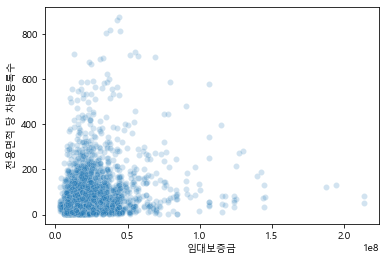

In [360]:
sns.scatterplot(data=train_df, x="임대보증금", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='전용면적별세대수', ylabel='전용면적 당 차량등록수'>

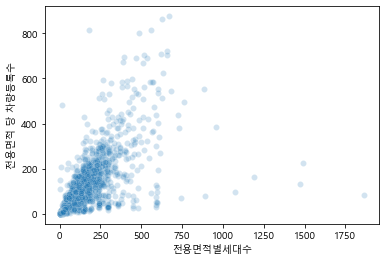

In [361]:
sns.scatterplot(data=train_df, x="전용면적별세대수", y="전용면적 당 차량등록수", alpha=0.2)

In [374]:
# 261, 417, 497, 523, 569

outlier_index = train_df[train_df["전용면적별세대수"] >= 1000].index
# train_df = train_df.drop(index=outlier_index, axis=0)

In [375]:
outlier_index

Int64Index([261, 417, 497, 523, 569], dtype='int64')

In [376]:
#2041
outlier_index = train_df[(train_df["전용면적별세대수"] <= 30) & (train_df["전용면적 당 차량등록수"] >=400)].index
train_df = train_df.drop(index=outlier_index, axis=0)

In [377]:
outlier_index

Int64Index([], dtype='int64')

In [382]:
# 2224, 2419, 2624, 2642, 2856 아웃라이어 제거

outlier_index=train_df[(train_df["전용면적별세대수"] > 150) & (train_df["전용면적 당 차량등록수"] > 750)].index
train_df = train_df.drop(index=outlier_index, axis=0)

In [383]:
outlier_index

Int64Index([2224, 2419, 2624, 2642, 2856], dtype='int64')

<AxesSubplot:xlabel='전용면적별세대수', ylabel='Count'>

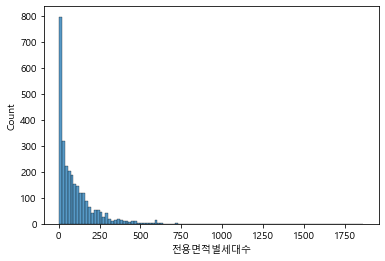

In [385]:
sns.histplot(train_df["전용면적별세대수"])

<AxesSubplot:xlabel='세대수 규모 당 총 전용면적', ylabel='전용면적 당 차량등록수'>

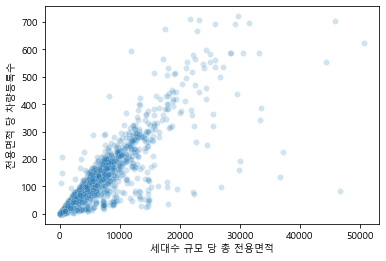

In [386]:
sns.scatterplot(data=train_df, x="세대수 규모 당 총 전용면적", y="전용면적 당 차량등록수", alpha=0.2)

In [389]:
# 261, 520, 2185, 2686
outlier_index = train_df[train_df["세대수 규모 당 총 전용면적"] > 40000].index

train_df = train_df.drop(index=outlier_index, axis=0)

In [390]:
outlier_index

Int64Index([], dtype='int64')

<AxesSubplot:xlabel='세대수 규모 당 총 전용면적', ylabel='Count'>

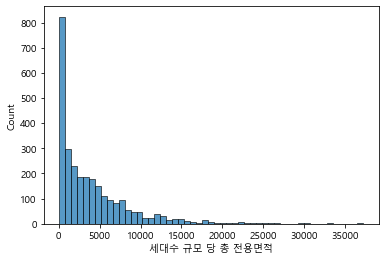

In [391]:
sns.histplot(train_df["세대수 규모 당 총 전용면적"])

<AxesSubplot:xlabel='실거주세대수', ylabel='전용면적 당 차량등록수'>

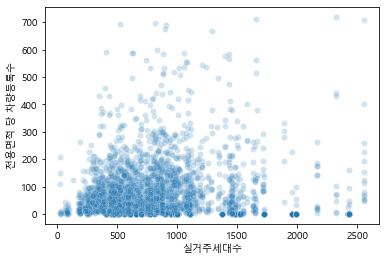

In [392]:
sns.scatterplot(data=train_df, x="실거주세대수", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='실거주세대수', ylabel='Count'>

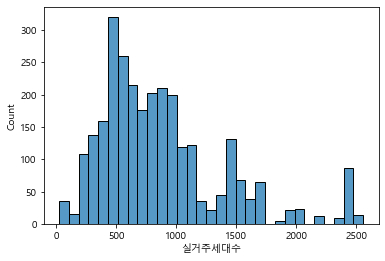

In [393]:
sns.histplot(train_df["실거주세대수"])

<AxesSubplot:xlabel='단지별 총 전용면적', ylabel='전용면적 당 차량등록수'>

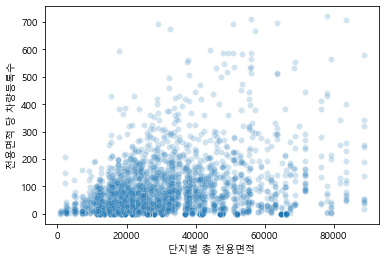

In [394]:
sns.scatterplot(data=train_df, x="단지별 총 전용면적", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='단지별 총 전용면적', ylabel='Count'>

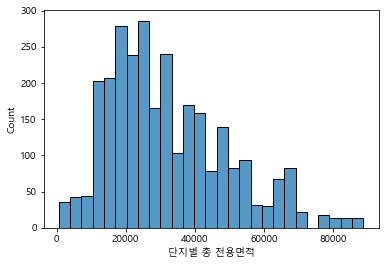

In [395]:
sns.histplot(train_df["단지별 총 전용면적"])

<AxesSubplot:xlabel='임대보증금', ylabel='전용면적 당 차량등록수'>

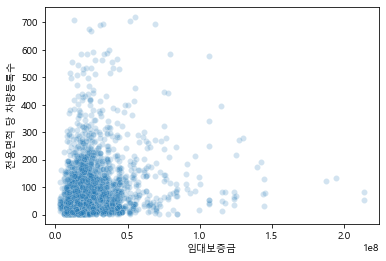

In [396]:
sns.scatterplot(data=train_df, x="임대보증금", y="전용면적 당 차량등록수", alpha=0.2)

In [399]:
# 임대보증금 아웃라이어 2026, 2100, 2101, 2102 제거

outlier_index = train_df[train_df["임대보증금"] >= 187694000].index
train_df = train_df.drop(index=outlier_index, axis=0)

In [400]:
outlier_index

Int64Index([], dtype='int64')

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='전용면적 당 차량등록수'>

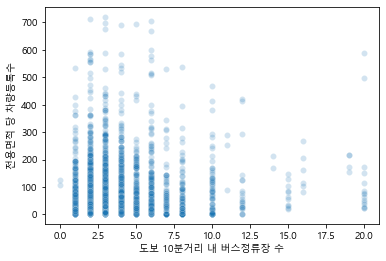

In [401]:
sns.scatterplot(data=train_df, x="도보 10분거리 내 버스정류장 수", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='도보 10분거리 내 버스정류장 수', ylabel='Count'>

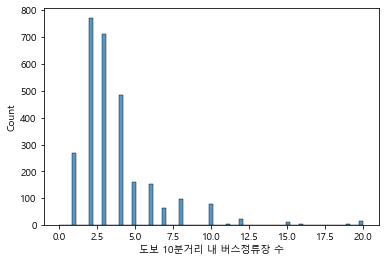

In [402]:
sns.histplot(train_df["도보 10분거리 내 버스정류장 수"])

<AxesSubplot:xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='전용면적 당 차량등록수'>

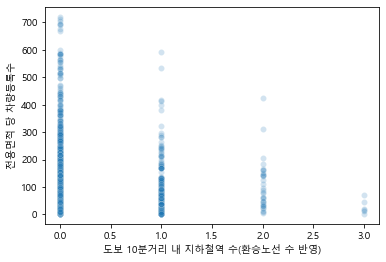

In [403]:
sns.scatterplot(data=train_df, x="도보 10분거리 내 지하철역 수(환승노선 수 반영)", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='도보 10분거리 내 지하철역 수(환승노선 수 반영)', ylabel='Count'>

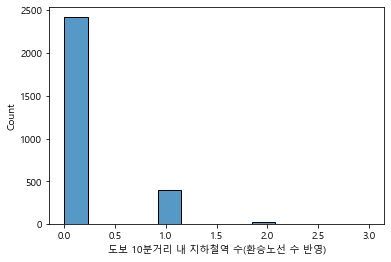

In [404]:
sns.histplot(train_df["도보 10분거리 내 지하철역 수(환승노선 수 반영)"])

<AxesSubplot:xlabel='상가', ylabel='전용면적 당 차량등록수'>

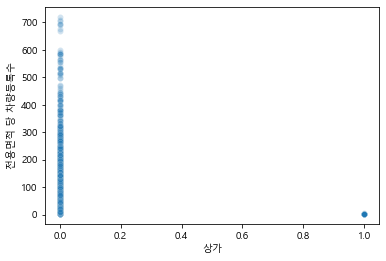

In [405]:
sns.scatterplot(data=train_df, x="상가", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

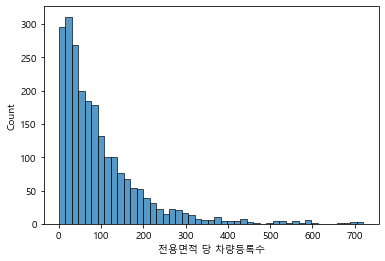

In [406]:
sns.histplot(train_df[train_df["상가"] == 0]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

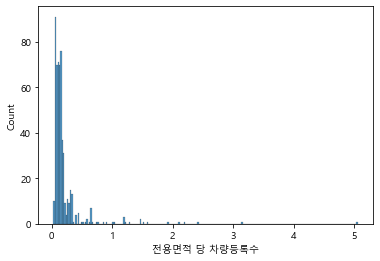

In [407]:
sns.histplot(train_df[train_df["상가"] == 1]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

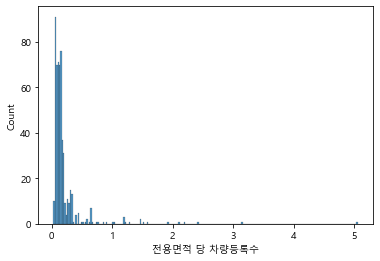

In [408]:
sns.histplot(train_df[train_df["아파트"] == 0]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

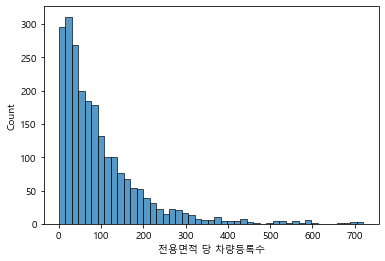

In [409]:
sns.histplot(train_df[train_df["아파트"] == 1]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='전용면적 당 차량등록수', ylabel='Count'>

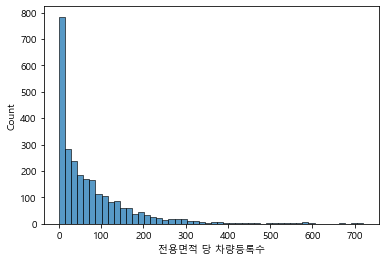

In [410]:
sns.histplot(train_df[train_df["강원도"] == 0]["전용면적 당 차량등록수"])

<AxesSubplot:xlabel='자격유형', ylabel='전용면적 당 차량등록수'>

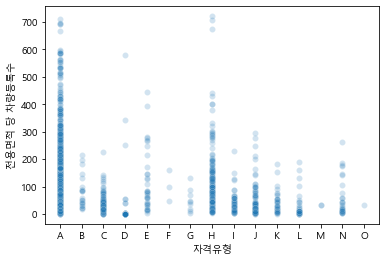

In [411]:
sns.scatterplot(data=train_df, x="자격유형", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='지역', ylabel='전용면적 당 차량등록수'>

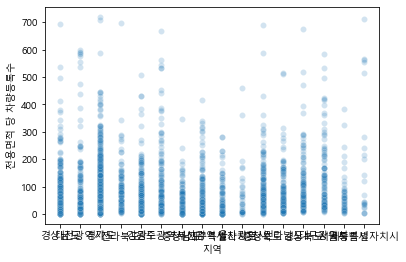

In [412]:
sns.scatterplot(data=train_df, x="지역", y="전용면적 당 차량등록수", alpha=0.2)

<AxesSubplot:xlabel='세대수비율주차면수', ylabel='전용면적 당 차량등록수'>

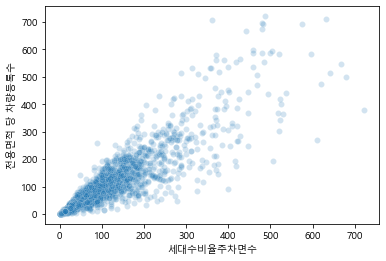

In [413]:
sns.scatterplot(data=train_df, x="세대수비율주차면수", y="전용면적 당 차량등록수", alpha=0.2)

In [416]:
# 세대수비율주차면수 아웃라이어 제거 2540

outlier_index = train_df[(train_df["세대수비율주차면수"] >= 700) & (train_df["전용면적 당 차량등록수"] < 400)].index
train_df = train_df.drop(index=outlier_index, axis=0)

In [417]:
outlier_index

Int64Index([], dtype='int64')

<AxesSubplot:>

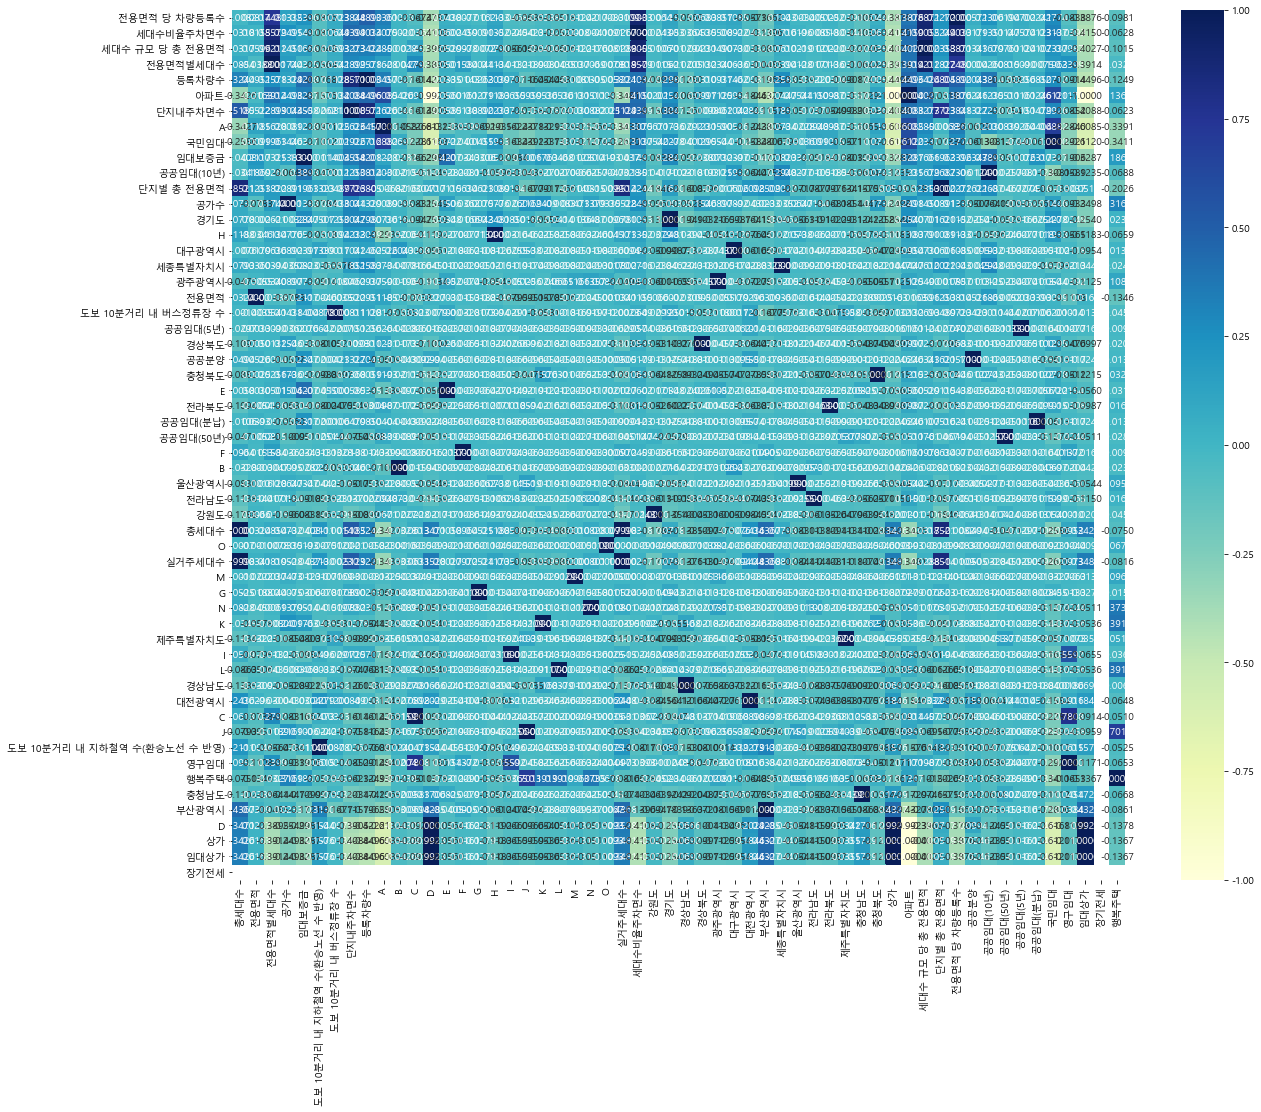

In [418]:
correlation_df = train_df.corr().sort_values(by="전용면적 당 차량등록수", ascending=False)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_df, annot=True, fmt=".4f", cmap='YlGnBu')

In [95]:
correlation_df

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,실거주세대수,세대수비율주차면수,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,상가,아파트,세대수 규모 당 총 전용면적,단지별 총 전용면적,전용면적 당 차량등록수,공공분양,공공임대(10년),공공임대(50년),공공임대(5년),공공임대(분납),국민임대,영구임대,임대상가,장기전세,행복주택
전용면적 당 차량등록수,-0.008533,0.086054,0.789069,0.121870,0.242554,-0.084184,0.070765,0.384005,0.493973,0.332329,0.001174,-0.071610,-0.367119,0.040441,-0.001769,-0.016084,0.105347,-0.046149,-0.067577,-0.038248,-0.050670,-0.012134,-0.021904,-0.008099,-0.011056,0.906960,-0.009189,0.104024,-0.043786,0.062814,0.089967,0.101255,-0.058378,-0.166774,0.124935,-0.004536,-0.007590,0.021693,-0.039303,-0.104141,0.051043,-0.375536,0.375536,0.904618,0.232436,1.000000,0.053883,0.266957,0.017333,0.066608,0.022382,0.250349,-0.088255,-0.375536,NaN,-0.096768
세대수비율주차면수,0.027472,0.021849,0.898431,0.239892,0.157454,-0.085429,0.064952,0.442654,0.415033,0.310859,0.001387,-0.044896,-0.404803,0.058042,0.016964,0.008393,0.130379,-0.024854,-0.042713,-0.019486,-0.051765,0.000619,-0.004765,-0.009015,0.022565,1.000000,-0.025551,0.099229,-0.028568,0.050868,0.055790,0.088709,-0.044455,-0.146818,0.089449,0.018407,-0.009897,0.016146,-0.034847,-0.102717,0.070890,-0.408829,0.408829,0.919891,0.229157,0.906960,0.017160,0.167297,0.013636,0.055847,0.011636,0.297702,-0.050803,-0.408829,NaN,-0.063255
세대수 규모 당 총 전용면적,0.016870,0.068713,0.925335,0.141603,0.183507,-0.076317,0.072934,0.344077,0.367491,0.302032,-0.002843,0.111674,-0.396409,0.052689,0.050331,-0.007277,0.078618,-0.056177,-0.069602,-0.040390,-0.060565,-0.012245,-0.017624,-0.008087,0.013975,0.919891,-0.010815,0.069467,-0.021727,0.022858,0.057609,0.072644,-0.033439,-0.107097,0.083134,0.021780,-0.012257,0.021774,-0.042455,-0.074684,0.045274,-0.402512,0.402512,1.000000,0.239519,0.904618,0.034181,0.203279,0.075896,0.012340,0.010665,0.232106,0.062740,-0.402512,NaN,-0.101567
전용면적별세대수,0.062013,-0.030675,1.000000,0.185720,0.054522,-0.075917,0.064737,0.323313,0.296089,0.195018,-0.004234,0.239442,-0.408762,0.054094,0.084130,0.005102,0.122182,-0.012856,-0.018442,-0.007569,-0.045225,0.004111,0.008135,-0.008124,0.058268,0.898431,-0.010054,0.070034,-0.013793,0.015670,0.043121,0.069000,-0.029149,-0.093733,0.058543,0.014436,-0.016227,0.016039,-0.031384,-0.066312,0.036364,-0.410776,0.410776,0.925335,0.185663,0.789069,0.000841,0.054284,0.087283,0.009768,-0.007566,0.218229,0.195092,-0.410776,NaN,-0.032354
등록차량수,0.327042,0.096542,0.296089,0.129783,0.421823,-0.077352,0.111463,0.857204,1.000000,0.346411,0.002242,-0.159578,-0.422678,0.032805,-0.011734,0.025917,0.201771,0.069731,-0.116820,-0.054687,-0.068368,-0.008232,0.029886,-0.005820,0.324801,0.415033,-0.099939,0.294027,-0.125318,0.029820,0.096214,0.144533,-0.009645,-0.195461,0.264052,-0.054230,-0.023077,-0.031232,-0.091272,-0.174589,0.007546,-0.449912,0.449912,0.367491,0.683992,0.493973,0.203075,0.390067,-0.059064,0.025368,0.084339,0.263739,-0.089065,-0.449912,NaN,-0.125648
단지내주차면수,0.521607,0.052993,0.323313,0.302376,0.356830,-0.026177,0.079991,1.000000,0.857204,0.263348,0.004377,-0.159442,-0.391326,0.058110,0.011133,0.088680,0.222257,0.071939,-0.076302,-0.028110,-0.074864,0.002945,0.087707,0.002082,0.516067,0.442654,-0.151320,0.302636,-0.125423,-0.010370,0.047800,0.103452,0.083825,-0.115006,0.189631,-0.051926,-0.037595,-0.055368,-0.099303,-0.203807,0.038416,-0.409617,0.409617,0.344077,0.774958,0.384005,0.132360,0.230656,-0.075575,0.014964,0.047712,0.288324,-0.083749,-0.409617,NaN,-0.063084
아파트,-0.345064,-0.015352,0.410776,0.249805,0.330165,-0.158689,0.013776,0.409617,0.449912,0.610290,0.042633,0.089865,-0.992311,0.055968,0.013113,0.027851,0.118260,0.065447,0.095815,0.053557,0.053557,0.013113,0.051037,0.009271,-0.350669,0.408829,0.020085,0.253863,-0.068086,0.099611,0.112887,0.095332,-0.184636,-0.437246,0.045601,0.054372,0.114978,0.098674,-0.035509,-0.172947,0.121870,-1.000000,1.000000,0.402512,-0.051478,0.375536,0.024554,0.125399,0.051037,0.016063,0.024554,0

In [419]:
# X_train & X_test 셋 선택

# ["상가", "등록차량수", "단지내주차면수", "단지별 총 전용면적", "실거주세대수", "지역", "공급유형", "전용면적", "자격유형", "임대료",
#  "전용면적 당 차량등록수", "총세대수"]

X_train_df_sel = train_df.drop(["단지코드", "상가", "등록차량수", "단지내주차면수", "단지별 총 전용면적", "실거주세대수", "지역", "공급유형", "전용면적", "자격유형", "임대료",
 "전용면적 당 차량등록수", "총세대수"], axis=1)

X_test_df_sel = test_df.drop(["단지코드", "상가", "단지내주차면수", "단지별 총 전용면적", "실거주세대수", "지역", "공급유형", "전용면적", "자격유형", "임대료",
 "총세대수"], axis=1)

y_train_df = train_df["전용면적 당 차량등록수"]

In [420]:
X_train_df_sel.columns

Index(['전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '세대수비율주차면수', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '아파트', '세대수 규모 당 총 전용면적', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택'],
      dtype='object')

In [421]:
column_names = ['전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '세대수비율주차면수', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '아파트', '세대수 규모 당 총 전용면적', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택']

X_test_df_sel = X_test_df_sel.reindex(columns=column_names)
X_test_df_sel.columns

Index(['전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
       'K', 'L', 'M', 'N', 'O', '세대수비율주차면수', '강원도', '경기도', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도', '아파트', '세대수 규모 당 총 전용면적', '공공분양',
       '공공임대(10년)', '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대',
       '임대상가', '장기전세', '행복주택'],
      dtype='object')

In [422]:
X_train_df_sel

,전용면적별세대수,공가수,임대보증금,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,세대수비율주차면수,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도,아파트,세대수 규모 당 총 전용면적,공공분양,공공임대(10년),공공임대(50년),공공임대(5년),공공임대(분납),국민임대,영구임대,임대상가,장기전세,행복주택
8,276,17.0,9216000.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,326.181818,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,8280.0,0,0,0,0,0,1,0,0,0,0
9,60,17.0,12672000.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70.909091,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2100.0,0,0,0,0,0,1,0,0,0,0
10,20,17.0,12672000.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.636364,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,700.0,0,0,0,0,0,1,0,0,0,0
11,38,17.0,18433000.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44.909091,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1710.0,0,0,0,0,0,1,0,0,0,0
12,19,17.0,18433000.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.454545,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,855.0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,19,7.0,11346000.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.594828,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,855.0,0,0,0,0,0,1,0,0,0,0
2948,34,7.0,14005000.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.327586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1700.0,0,0,0,0,0,1,0,0,0,0
2949,34,7.0,14005000.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.327586,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1700.0,0,0,0,0,0,1,0,0,0,0
2950,114,7.0,14005000.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81.568966,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5700.0,0,0,0,0,0,1,0,0,0,0


In [423]:
X_train_df_log = X_train_df_sel.apply(lambda x: np.log1p(x))
X_test_df_log = X_test_df_sel.apply(lambda x: np.log1p(x))
y_train_df_log = y_train_df.apply(lambda x: np.log1p(x))

### Linear Regression 모델 평가

In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from catboost import Pool, CatBoostRegressor


In [424]:
X_train_df_log.shape, X_test_df_log.shape, y_train_df_log.shape

((2853, 48), (1008, 48), (2853,))

In [103]:
params = {"alpha": [0.001, 0.01, 0.02, 0.03, 0.05, 0.07, 0.9, 1, 1.1, 1.5, 2, 5, 10, 15, 20, 25, 30, 40, 50]}
ridge_model = Ridge()

grid_model = GridSearchCV(ridge_model, param_grid=params, cv=5, scoring="neg_mean_absolute_error")
grid_model.fit(X_train_df_log, y_train_df_log)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.05, 0.07, 0.9, 1,
                                   1.1, 1.5, 2, 5, 10, 15, 20, 25, 30, 40,
                                   50]},
             scoring='neg_mean_absolute_error')

In [104]:
grid_model.best_params_

{'alpha': 30}

In [105]:
best_ridge = grid_model.best_estimator_
best_ridge

Ridge(alpha=30)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df_log, y_train_df_log, test_size=0.25,
                                                    random_state=42)

pred = best_ridge.predict(X_test)
mean_absolute_error(np.expm1(y_test), np.expm1(pred))

14.716942200737984

In [107]:
ridge_model = Ridge(alpha=30)
ridge_model.fit(X_train_df_log, y_train_df_log)
pred = ridge_model.predict(X_test_df_log)
pred = np.expm1(pred)

result = pd.DataFrame(data=pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
# sub_df.to_csv("ridge_with_이상치처리_다중공선성피처제거_0722.csv", index=False)

sub_df

,code,num
0,C1072,695.774506
1,C1128,1185.740972
2,C1456,547.213972
3,C1840,491.149263
4,C1332,1130.762908
...,...,...
145,C2456,232.423730
146,C1266,422.569213
147,C2152,28.756858
148,C1267,335.554013


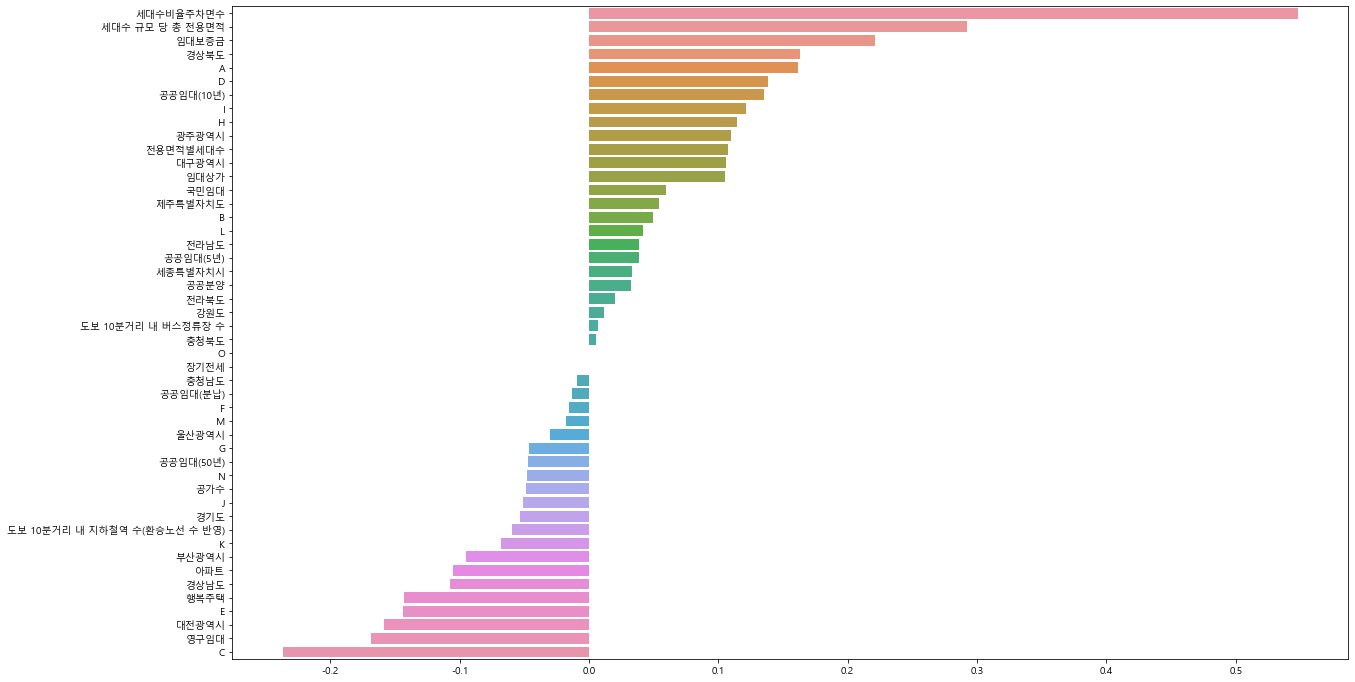

In [108]:
importance = ridge_model.coef_
feature_importance = pd.Series(data=importance, index=X_train_df_log.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(20, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

In [109]:
cat_reg = CatBoostRegressor()

cat_reg.fit(X_train, y_train)
pred = cat_reg.predict(X_test)

mean_absolute_error(np.expm1(y_test), np.expm1(pred))

Learning rate set to 0.04469
0:	learn: 1.7666323	total: 192ms	remaining: 3m 11s
1:	learn: 1.6949588	total: 208ms	remaining: 1m 43s
2:	learn: 1.6282127	total: 223ms	remaining: 1m 14s
3:	learn: 1.5617337	total: 239ms	remaining: 59.5s
4:	learn: 1.5006612	total: 251ms	remaining: 50s
5:	learn: 1.4393472	total: 267ms	remaining: 44.3s
6:	learn: 1.3816965	total: 281ms	remaining: 39.8s
7:	learn: 1.3295461	total: 294ms	remaining: 36.5s
8:	learn: 1.2757298	total: 308ms	remaining: 34s
9:	learn: 1.2260460	total: 321ms	remaining: 31.8s
10:	learn: 1.1799607	total: 329ms	remaining: 29.6s
11:	learn: 1.1340970	total: 335ms	remaining: 27.6s
12:	learn: 1.0905202	total: 340ms	remaining: 25.8s
13:	learn: 1.0480217	total: 344ms	remaining: 24.2s
14:	learn: 1.0092599	total: 346ms	remaining: 22.7s
15:	learn: 0.9705941	total: 349ms	remaining: 21.5s
16:	learn: 0.9348442	total: 352ms	remaining: 20.4s
17:	learn: 0.8998656	total: 357ms	remaining: 19.5s
18:	learn: 0.8689824	total: 360ms	remaining: 18.6s
19:	learn: 0.

189:	learn: 0.2040171	total: 1.01s	remaining: 4.33s
190:	learn: 0.2036959	total: 1.02s	remaining: 4.32s
191:	learn: 0.2034681	total: 1.03s	remaining: 4.32s
192:	learn: 0.2029322	total: 1.03s	remaining: 4.31s
193:	learn: 0.2025060	total: 1.03s	remaining: 4.29s
194:	learn: 0.2022333	total: 1.04s	remaining: 4.3s
195:	learn: 0.2019418	total: 1.04s	remaining: 4.29s
196:	learn: 0.2016010	total: 1.05s	remaining: 4.28s
197:	learn: 0.2013746	total: 1.06s	remaining: 4.28s
198:	learn: 0.2011891	total: 1.06s	remaining: 4.27s
199:	learn: 0.2008816	total: 1.06s	remaining: 4.25s
200:	learn: 0.2004459	total: 1.07s	remaining: 4.26s
201:	learn: 0.2001905	total: 1.08s	remaining: 4.25s
202:	learn: 0.2000661	total: 1.09s	remaining: 4.28s
203:	learn: 0.1998777	total: 1.1s	remaining: 4.3s
204:	learn: 0.1995363	total: 1.11s	remaining: 4.29s
205:	learn: 0.1992501	total: 1.11s	remaining: 4.28s
206:	learn: 0.1988868	total: 1.11s	remaining: 4.27s
207:	learn: 0.1987468	total: 1.12s	remaining: 4.26s
208:	learn: 0.1

351:	learn: 0.1675148	total: 1.67s	remaining: 3.07s
352:	learn: 0.1672825	total: 1.67s	remaining: 3.06s
353:	learn: 0.1671050	total: 1.68s	remaining: 3.06s
354:	learn: 0.1669601	total: 1.68s	remaining: 3.06s
355:	learn: 0.1668775	total: 1.69s	remaining: 3.05s
356:	learn: 0.1667161	total: 1.69s	remaining: 3.04s
357:	learn: 0.1665729	total: 1.69s	remaining: 3.03s
358:	learn: 0.1664679	total: 1.7s	remaining: 3.03s
359:	learn: 0.1663613	total: 1.7s	remaining: 3.02s
360:	learn: 0.1662554	total: 1.7s	remaining: 3.01s
361:	learn: 0.1659588	total: 1.71s	remaining: 3.01s
362:	learn: 0.1659302	total: 1.71s	remaining: 3s
363:	learn: 0.1657313	total: 1.71s	remaining: 2.99s
364:	learn: 0.1655923	total: 1.72s	remaining: 2.99s
365:	learn: 0.1654218	total: 1.72s	remaining: 2.98s
366:	learn: 0.1651873	total: 1.73s	remaining: 2.98s
367:	learn: 0.1648396	total: 1.73s	remaining: 2.97s
368:	learn: 0.1645525	total: 1.73s	remaining: 2.96s
369:	learn: 0.1643996	total: 1.74s	remaining: 2.96s
370:	learn: 0.1643

524:	learn: 0.1419696	total: 2.33s	remaining: 2.1s
525:	learn: 0.1417926	total: 2.33s	remaining: 2.1s
526:	learn: 0.1416942	total: 2.34s	remaining: 2.1s
527:	learn: 0.1415588	total: 2.34s	remaining: 2.1s
528:	learn: 0.1414968	total: 2.35s	remaining: 2.09s
529:	learn: 0.1413085	total: 2.35s	remaining: 2.09s
530:	learn: 0.1411725	total: 2.36s	remaining: 2.08s
531:	learn: 0.1409901	total: 2.36s	remaining: 2.08s
532:	learn: 0.1408716	total: 2.37s	remaining: 2.08s
533:	learn: 0.1407773	total: 2.37s	remaining: 2.07s
534:	learn: 0.1406685	total: 2.38s	remaining: 2.07s
535:	learn: 0.1404631	total: 2.38s	remaining: 2.06s
536:	learn: 0.1403108	total: 2.39s	remaining: 2.06s
537:	learn: 0.1402340	total: 2.39s	remaining: 2.05s
538:	learn: 0.1400866	total: 2.4s	remaining: 2.05s
539:	learn: 0.1397880	total: 2.4s	remaining: 2.05s
540:	learn: 0.1396920	total: 2.41s	remaining: 2.04s
541:	learn: 0.1394338	total: 2.41s	remaining: 2.04s
542:	learn: 0.1394012	total: 2.42s	remaining: 2.03s
543:	learn: 0.1391

691:	learn: 0.1227299	total: 2.98s	remaining: 1.33s
692:	learn: 0.1226418	total: 2.99s	remaining: 1.32s
693:	learn: 0.1225493	total: 2.99s	remaining: 1.32s
694:	learn: 0.1225140	total: 2.99s	remaining: 1.31s
695:	learn: 0.1224455	total: 3s	remaining: 1.31s
696:	learn: 0.1223456	total: 3s	remaining: 1.3s
697:	learn: 0.1221848	total: 3s	remaining: 1.3s
698:	learn: 0.1219208	total: 3.01s	remaining: 1.29s
699:	learn: 0.1218097	total: 3.01s	remaining: 1.29s
700:	learn: 0.1217435	total: 3.02s	remaining: 1.29s
701:	learn: 0.1216532	total: 3.02s	remaining: 1.28s
702:	learn: 0.1215494	total: 3.02s	remaining: 1.28s
703:	learn: 0.1214744	total: 3.03s	remaining: 1.27s
704:	learn: 0.1213401	total: 3.03s	remaining: 1.27s
705:	learn: 0.1212148	total: 3.04s	remaining: 1.26s
706:	learn: 0.1210257	total: 3.04s	remaining: 1.26s
707:	learn: 0.1210135	total: 3.04s	remaining: 1.25s
708:	learn: 0.1209666	total: 3.05s	remaining: 1.25s
709:	learn: 0.1209124	total: 3.05s	remaining: 1.25s
710:	learn: 0.1208562	t

853:	learn: 0.1073596	total: 3.64s	remaining: 623ms
854:	learn: 0.1072955	total: 3.65s	remaining: 618ms
855:	learn: 0.1071746	total: 3.65s	remaining: 615ms
856:	learn: 0.1070844	total: 3.66s	remaining: 610ms
857:	learn: 0.1069765	total: 3.66s	remaining: 606ms
858:	learn: 0.1069228	total: 3.67s	remaining: 602ms
859:	learn: 0.1069024	total: 3.67s	remaining: 598ms
860:	learn: 0.1068013	total: 3.68s	remaining: 593ms
861:	learn: 0.1067779	total: 3.68s	remaining: 590ms
862:	learn: 0.1066962	total: 3.69s	remaining: 585ms
863:	learn: 0.1065466	total: 3.69s	remaining: 581ms
864:	learn: 0.1064536	total: 3.7s	remaining: 578ms
865:	learn: 0.1064008	total: 3.71s	remaining: 573ms
866:	learn: 0.1063494	total: 3.71s	remaining: 569ms
867:	learn: 0.1062704	total: 3.71s	remaining: 565ms
868:	learn: 0.1060573	total: 3.72s	remaining: 561ms
869:	learn: 0.1059403	total: 3.72s	remaining: 556ms
870:	learn: 0.1056691	total: 3.73s	remaining: 552ms
871:	learn: 0.1055407	total: 3.73s	remaining: 548ms
872:	learn: 0

9.38574738025158

In [110]:
# 릿지 0.5 & LGBM 0.5 조합 -> 12.3456 Score: 93.5424 (인구데이터 추가)
# 릿지 1.0 -> 14.9751 Score: 95.6543 (인구데이터 X)

# 릿지 0.9 & CatBoost 0.1 조합 -> 14.18295
# 릿지 0.8 & CatBoost 0.2 조합 -> 13.4380
# 릿지 0.7 & CatBoost 0.3 조합 -> 12.7728
# 릿지 0.6 & CatBoost 0.4 조합 -> 12.1470
# 릿지 0.5 & CatBoost 0.5 조합 -> 11.6074

# 릿지 alpha=50, 값으로 예측!!! 결과
# 릿지 0.5 & CatBoost 0.5 조합 -> 11.6044
# 릿지 0.4 & CatBoost 0.6 조합 -> 11.0139
# 릿지 0.3 & CatBoost 0.7 조합 -> 10.5106

# 릿지 alpha=40,값으로 예측!! 결과
# 릿지 0.3 & CatBoost 0.7 조합 -> 10.4283
# 릿지 0.4 & CatBoost 0.6 조합 -> 10.9511

ridge_model = Ridge(alpha=30)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(X_train, y_train)
cat_pred = cat_reg.predict(X_test)

final_pred = (ridge_pred * 0.4) + (cat_pred * 0.6)
mean_absolute_error(np.expm1(y_test), np.expm1(final_pred))

Learning rate set to 0.04469
0:	learn: 1.7660153	total: 6.28ms	remaining: 6.27s
1:	learn: 1.6939579	total: 10.8ms	remaining: 5.38s
2:	learn: 1.6270559	total: 16.1ms	remaining: 5.35s
3:	learn: 1.5630121	total: 21ms	remaining: 5.22s
4:	learn: 1.4996392	total: 26.9ms	remaining: 5.35s
5:	learn: 1.4397555	total: 31.4ms	remaining: 5.21s
6:	learn: 1.3823125	total: 35.2ms	remaining: 4.99s
7:	learn: 1.3266946	total: 39.2ms	remaining: 4.86s
8:	learn: 1.2751619	total: 42.1ms	remaining: 4.64s
9:	learn: 1.2257300	total: 47.1ms	remaining: 4.66s
10:	learn: 1.1793590	total: 50.9ms	remaining: 4.58s
11:	learn: 1.1361100	total: 54.1ms	remaining: 4.46s
12:	learn: 1.0919931	total: 57.5ms	remaining: 4.36s
13:	learn: 1.0510757	total: 61.9ms	remaining: 4.36s
14:	learn: 1.0102971	total: 66.8ms	remaining: 4.38s
15:	learn: 0.9712882	total: 70ms	remaining: 4.3s
16:	learn: 0.9344677	total: 74.2ms	remaining: 4.29s
17:	learn: 0.8992607	total: 77.1ms	remaining: 4.21s
18:	learn: 0.8657534	total: 81.6ms	remaining: 4.21

168:	learn: 0.2116258	total: 652ms	remaining: 3.21s
169:	learn: 0.2111094	total: 670ms	remaining: 3.27s
170:	learn: 0.2107636	total: 681ms	remaining: 3.3s
171:	learn: 0.2103980	total: 687ms	remaining: 3.31s
172:	learn: 0.2102665	total: 697ms	remaining: 3.33s
173:	learn: 0.2100544	total: 721ms	remaining: 3.42s
174:	learn: 0.2097976	total: 727ms	remaining: 3.43s
175:	learn: 0.2094967	total: 733ms	remaining: 3.43s
176:	learn: 0.2092703	total: 741ms	remaining: 3.44s
177:	learn: 0.2090004	total: 747ms	remaining: 3.45s
178:	learn: 0.2085603	total: 753ms	remaining: 3.45s
179:	learn: 0.2083900	total: 757ms	remaining: 3.45s
180:	learn: 0.2082915	total: 759ms	remaining: 3.44s
181:	learn: 0.2078172	total: 764ms	remaining: 3.43s
182:	learn: 0.2074883	total: 769ms	remaining: 3.43s
183:	learn: 0.2072927	total: 779ms	remaining: 3.46s
184:	learn: 0.2069890	total: 783ms	remaining: 3.45s
185:	learn: 0.2067704	total: 787ms	remaining: 3.44s
186:	learn: 0.2065177	total: 791ms	remaining: 3.44s
187:	learn: 0

332:	learn: 0.1730470	total: 1.31s	remaining: 2.62s
333:	learn: 0.1729419	total: 1.31s	remaining: 2.62s
334:	learn: 0.1728870	total: 1.31s	remaining: 2.61s
335:	learn: 0.1724543	total: 1.32s	remaining: 2.61s
336:	learn: 0.1724076	total: 1.32s	remaining: 2.6s
337:	learn: 0.1719373	total: 1.33s	remaining: 2.6s
338:	learn: 0.1716583	total: 1.33s	remaining: 2.59s
339:	learn: 0.1714786	total: 1.33s	remaining: 2.59s
340:	learn: 0.1713067	total: 1.34s	remaining: 2.58s
341:	learn: 0.1711211	total: 1.34s	remaining: 2.58s
342:	learn: 0.1706851	total: 1.34s	remaining: 2.58s
343:	learn: 0.1704365	total: 1.35s	remaining: 2.57s
344:	learn: 0.1703842	total: 1.35s	remaining: 2.57s
345:	learn: 0.1700630	total: 1.35s	remaining: 2.56s
346:	learn: 0.1697608	total: 1.36s	remaining: 2.56s
347:	learn: 0.1695684	total: 1.36s	remaining: 2.55s
348:	learn: 0.1694019	total: 1.37s	remaining: 2.55s
349:	learn: 0.1693464	total: 1.37s	remaining: 2.54s
350:	learn: 0.1691099	total: 1.37s	remaining: 2.54s
351:	learn: 0.

525:	learn: 0.1423026	total: 1.96s	remaining: 1.77s
526:	learn: 0.1421708	total: 1.97s	remaining: 1.77s
527:	learn: 0.1420479	total: 1.97s	remaining: 1.76s
528:	learn: 0.1418912	total: 1.98s	remaining: 1.76s
529:	learn: 0.1418083	total: 1.98s	remaining: 1.75s
530:	learn: 0.1416932	total: 1.98s	remaining: 1.75s
531:	learn: 0.1416600	total: 1.99s	remaining: 1.75s
532:	learn: 0.1413986	total: 1.99s	remaining: 1.74s
533:	learn: 0.1412632	total: 1.99s	remaining: 1.74s
534:	learn: 0.1412490	total: 2s	remaining: 1.74s
535:	learn: 0.1411168	total: 2s	remaining: 1.73s
536:	learn: 0.1410641	total: 2s	remaining: 1.73s
537:	learn: 0.1409714	total: 2.01s	remaining: 1.73s
538:	learn: 0.1408440	total: 2.01s	remaining: 1.72s
539:	learn: 0.1407310	total: 2.02s	remaining: 1.72s
540:	learn: 0.1406303	total: 2.02s	remaining: 1.72s
541:	learn: 0.1406218	total: 2.02s	remaining: 1.71s
542:	learn: 0.1405464	total: 2.03s	remaining: 1.71s
543:	learn: 0.1404807	total: 2.03s	remaining: 1.7s
544:	learn: 0.1403290	

716:	learn: 0.1205622	total: 2.62s	remaining: 1.03s
717:	learn: 0.1204324	total: 2.62s	remaining: 1.03s
718:	learn: 0.1202668	total: 2.63s	remaining: 1.03s
719:	learn: 0.1201459	total: 2.63s	remaining: 1.02s
720:	learn: 0.1200915	total: 2.63s	remaining: 1.02s
721:	learn: 0.1199869	total: 2.64s	remaining: 1.01s
722:	learn: 0.1198597	total: 2.64s	remaining: 1.01s
723:	learn: 0.1197091	total: 2.65s	remaining: 1.01s
724:	learn: 0.1196291	total: 2.65s	remaining: 1s
725:	learn: 0.1194939	total: 2.65s	remaining: 1s
726:	learn: 0.1194617	total: 2.66s	remaining: 998ms
727:	learn: 0.1194135	total: 2.66s	remaining: 994ms
728:	learn: 0.1193653	total: 2.67s	remaining: 991ms
729:	learn: 0.1192779	total: 2.67s	remaining: 987ms
730:	learn: 0.1190980	total: 2.67s	remaining: 984ms
731:	learn: 0.1190388	total: 2.68s	remaining: 981ms
732:	learn: 0.1189291	total: 2.68s	remaining: 977ms
733:	learn: 0.1187728	total: 2.69s	remaining: 973ms
734:	learn: 0.1187277	total: 2.69s	remaining: 969ms
735:	learn: 0.1186

908:	learn: 0.1033806	total: 3.28s	remaining: 329ms
909:	learn: 0.1033149	total: 3.29s	remaining: 325ms
910:	learn: 0.1033092	total: 3.29s	remaining: 321ms
911:	learn: 0.1032245	total: 3.29s	remaining: 318ms
912:	learn: 0.1031014	total: 3.3s	remaining: 314ms
913:	learn: 0.1030440	total: 3.3s	remaining: 311ms
914:	learn: 0.1029579	total: 3.3s	remaining: 307ms
915:	learn: 0.1028782	total: 3.31s	remaining: 303ms
916:	learn: 0.1028403	total: 3.31s	remaining: 300ms
917:	learn: 0.1027981	total: 3.32s	remaining: 296ms
918:	learn: 0.1027506	total: 3.32s	remaining: 293ms
919:	learn: 0.1027369	total: 3.32s	remaining: 289ms
920:	learn: 0.1026736	total: 3.33s	remaining: 285ms
921:	learn: 0.1026227	total: 3.33s	remaining: 282ms
922:	learn: 0.1026127	total: 3.34s	remaining: 278ms
923:	learn: 0.1026097	total: 3.34s	remaining: 275ms
924:	learn: 0.1024782	total: 3.34s	remaining: 271ms
925:	learn: 0.1024117	total: 3.35s	remaining: 267ms
926:	learn: 0.1023775	total: 3.35s	remaining: 264ms
927:	learn: 0.1

10.85041075585428

In [111]:
# 릿지 (alpha=40) 0.4 & CatBoost 0.6 조합 -> 88.6317475529 , MAE -> 10.9511
# 릿지 (alpha=40) 0.3 & CatBoost 0.7 조합 -> 89.9021750236, MAE -> 10.4283

ridge_model = Ridge(alpha=30)
ridge_model.fit(X_train_df_log, y_train_df_log)
ridge_pred = ridge_model.predict(X_test_df_log)

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(X_train_df_log, y_train_df_log)
cat_pred = cat_reg.predict(X_test_df_log)

final_pred = (ridge_pred * 0.4) + (cat_pred * 0.6)
final_pred = np.expm1(final_pred)

result = pd.DataFrame(data=final_pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
sub_df.to_csv("ridge(0.4)&catboost(0.6)조합_공급유형추가_임대보증금지역예측값적용_0727.csv", index=False)

sub_df

Learning rate set to 0.04704
0:	learn: 1.7676638	total: 5.88ms	remaining: 5.88s
1:	learn: 1.6932903	total: 10.1ms	remaining: 5.02s
2:	learn: 1.6217559	total: 14.4ms	remaining: 4.79s
3:	learn: 1.5530860	total: 18.1ms	remaining: 4.5s
4:	learn: 1.4871545	total: 21.6ms	remaining: 4.29s
5:	learn: 1.4250644	total: 25.7ms	remaining: 4.26s
6:	learn: 1.3651551	total: 29.1ms	remaining: 4.13s
7:	learn: 1.3099859	total: 31.2ms	remaining: 3.87s
8:	learn: 1.2567135	total: 34.8ms	remaining: 3.83s
9:	learn: 1.2053241	total: 38.3ms	remaining: 3.79s
10:	learn: 1.1561144	total: 41.7ms	remaining: 3.75s
11:	learn: 1.1085535	total: 45.3ms	remaining: 3.73s
12:	learn: 1.0651810	total: 48ms	remaining: 3.65s
13:	learn: 1.0230843	total: 52.1ms	remaining: 3.67s
14:	learn: 0.9826531	total: 55.7ms	remaining: 3.66s
15:	learn: 0.9440812	total: 59.2ms	remaining: 3.64s
16:	learn: 0.9082635	total: 62.5ms	remaining: 3.61s
17:	learn: 0.8740238	total: 66.1ms	remaining: 3.61s
18:	learn: 0.8399272	total: 69.8ms	remaining: 3.

160:	learn: 0.2220560	total: 662ms	remaining: 3.45s
161:	learn: 0.2215452	total: 666ms	remaining: 3.44s
162:	learn: 0.2211797	total: 671ms	remaining: 3.44s
163:	learn: 0.2209288	total: 675ms	remaining: 3.44s
164:	learn: 0.2206593	total: 678ms	remaining: 3.43s
165:	learn: 0.2200588	total: 683ms	remaining: 3.43s
166:	learn: 0.2196871	total: 687ms	remaining: 3.43s
167:	learn: 0.2193394	total: 691ms	remaining: 3.42s
168:	learn: 0.2190649	total: 695ms	remaining: 3.42s
169:	learn: 0.2188023	total: 699ms	remaining: 3.41s
170:	learn: 0.2185238	total: 703ms	remaining: 3.41s
171:	learn: 0.2182682	total: 707ms	remaining: 3.4s
172:	learn: 0.2179817	total: 712ms	remaining: 3.4s
173:	learn: 0.2177151	total: 717ms	remaining: 3.4s
174:	learn: 0.2175111	total: 722ms	remaining: 3.4s
175:	learn: 0.2172383	total: 728ms	remaining: 3.41s
176:	learn: 0.2169313	total: 731ms	remaining: 3.4s
177:	learn: 0.2167346	total: 735ms	remaining: 3.39s
178:	learn: 0.2161636	total: 738ms	remaining: 3.38s
179:	learn: 0.215

319:	learn: 0.1766700	total: 1.49s	remaining: 3.17s
320:	learn: 0.1764437	total: 1.5s	remaining: 3.18s
321:	learn: 0.1762433	total: 1.51s	remaining: 3.17s
322:	learn: 0.1760569	total: 1.51s	remaining: 3.18s
323:	learn: 0.1760314	total: 1.52s	remaining: 3.17s
324:	learn: 0.1758140	total: 1.53s	remaining: 3.18s
325:	learn: 0.1755875	total: 1.53s	remaining: 3.17s
326:	learn: 0.1752922	total: 1.54s	remaining: 3.18s
327:	learn: 0.1752613	total: 1.55s	remaining: 3.17s
328:	learn: 0.1750894	total: 1.56s	remaining: 3.18s
329:	learn: 0.1748881	total: 1.56s	remaining: 3.18s
330:	learn: 0.1748266	total: 1.57s	remaining: 3.18s
331:	learn: 0.1744856	total: 1.58s	remaining: 3.18s
332:	learn: 0.1742289	total: 1.59s	remaining: 3.18s
333:	learn: 0.1742044	total: 1.59s	remaining: 3.18s
334:	learn: 0.1740810	total: 1.6s	remaining: 3.18s
335:	learn: 0.1739033	total: 1.61s	remaining: 3.17s
336:	learn: 0.1736629	total: 1.62s	remaining: 3.19s
337:	learn: 0.1734381	total: 1.63s	remaining: 3.19s
338:	learn: 0.

494:	learn: 0.1473826	total: 2.49s	remaining: 2.54s
495:	learn: 0.1471772	total: 2.49s	remaining: 2.53s
496:	learn: 0.1471059	total: 2.5s	remaining: 2.53s
497:	learn: 0.1467202	total: 2.51s	remaining: 2.53s
498:	learn: 0.1466648	total: 2.52s	remaining: 2.53s
499:	learn: 0.1465612	total: 2.52s	remaining: 2.52s
500:	learn: 0.1464677	total: 2.53s	remaining: 2.52s
501:	learn: 0.1463303	total: 2.53s	remaining: 2.51s
502:	learn: 0.1461895	total: 2.54s	remaining: 2.51s
503:	learn: 0.1459875	total: 2.54s	remaining: 2.5s
504:	learn: 0.1456563	total: 2.55s	remaining: 2.5s
505:	learn: 0.1455517	total: 2.56s	remaining: 2.5s
506:	learn: 0.1453938	total: 2.56s	remaining: 2.49s
507:	learn: 0.1452715	total: 2.56s	remaining: 2.48s
508:	learn: 0.1452210	total: 2.57s	remaining: 2.48s
509:	learn: 0.1450799	total: 2.57s	remaining: 2.47s
510:	learn: 0.1449097	total: 2.58s	remaining: 2.47s
511:	learn: 0.1446748	total: 2.58s	remaining: 2.46s
512:	learn: 0.1444532	total: 2.59s	remaining: 2.46s
513:	learn: 0.14

665:	learn: 0.1254080	total: 3.49s	remaining: 1.75s
666:	learn: 0.1253266	total: 3.49s	remaining: 1.74s
667:	learn: 0.1252501	total: 3.5s	remaining: 1.74s
668:	learn: 0.1251589	total: 3.51s	remaining: 1.74s
669:	learn: 0.1251492	total: 3.51s	remaining: 1.73s
670:	learn: 0.1250958	total: 3.52s	remaining: 1.73s
671:	learn: 0.1249644	total: 3.52s	remaining: 1.72s
672:	learn: 0.1248467	total: 3.53s	remaining: 1.71s
673:	learn: 0.1247683	total: 3.53s	remaining: 1.71s
674:	learn: 0.1245956	total: 3.54s	remaining: 1.71s
675:	learn: 0.1244725	total: 3.55s	remaining: 1.7s
676:	learn: 0.1242785	total: 3.56s	remaining: 1.7s
677:	learn: 0.1240614	total: 3.56s	remaining: 1.69s
678:	learn: 0.1240394	total: 3.57s	remaining: 1.69s
679:	learn: 0.1239482	total: 3.58s	remaining: 1.68s
680:	learn: 0.1238552	total: 3.58s	remaining: 1.68s
681:	learn: 0.1238031	total: 3.59s	remaining: 1.67s
682:	learn: 0.1236259	total: 3.6s	remaining: 1.67s
683:	learn: 0.1235355	total: 3.6s	remaining: 1.66s
684:	learn: 0.123

847:	learn: 0.1098497	total: 4.64s	remaining: 832ms
848:	learn: 0.1097779	total: 4.65s	remaining: 827ms
849:	learn: 0.1097039	total: 4.66s	remaining: 822ms
850:	learn: 0.1096657	total: 4.66s	remaining: 816ms
851:	learn: 0.1095183	total: 4.67s	remaining: 811ms
852:	learn: 0.1094432	total: 4.67s	remaining: 805ms
853:	learn: 0.1093735	total: 4.68s	remaining: 800ms
854:	learn: 0.1093172	total: 4.68s	remaining: 794ms
855:	learn: 0.1092124	total: 4.69s	remaining: 788ms
856:	learn: 0.1091653	total: 4.69s	remaining: 783ms
857:	learn: 0.1090500	total: 4.7s	remaining: 777ms
858:	learn: 0.1090203	total: 4.7s	remaining: 772ms
859:	learn: 0.1088968	total: 4.71s	remaining: 766ms
860:	learn: 0.1087898	total: 4.71s	remaining: 761ms
861:	learn: 0.1087138	total: 4.72s	remaining: 755ms
862:	learn: 0.1086902	total: 4.72s	remaining: 750ms
863:	learn: 0.1086308	total: 4.73s	remaining: 745ms
864:	learn: 0.1085247	total: 4.74s	remaining: 740ms
865:	learn: 0.1084365	total: 4.74s	remaining: 734ms
866:	learn: 0.

,code,num
0,C1072,716.828954
1,C1128,1317.521284
2,C1456,498.900406
3,C1840,473.037570
4,C1332,1194.464876
...,...,...
145,C2456,238.440204
146,C1266,414.482352
147,C2152,26.190169
148,C1267,342.231039


In [112]:
from sklearn.linear_model import Lasso


params = {"alpha": [0.0005, 0.0009, 0.001, 0.01, 0.02, 0.03, 0.05, 0.07, 0.9, 1, 1.1, 1.5, 2, 5, 10, 15, 20, 25, 30, 40, 50]}
lasso_model = Lasso()


lasso_grid = GridSearchCV(lasso_model, param_grid=params, cv=5, scoring="neg_mean_absolute_error")
lasso_grid.fit(X_train_df_log, y_train_df_log)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0005, 0.0009, 0.001, 0.01, 0.02, 0.03,
                                   0.05, 0.07, 0.9, 1, 1.1, 1.5, 2, 5, 10, 15,
                                   20, 25, 30, 40, 50]},
             scoring='neg_mean_absolute_error')

In [113]:
lasso_grid.best_params_

{'alpha': 0.001}

In [114]:
lasso_grid.best_estimator_.coef_

array([ 0.01841803, -0.04826869,  0.2036506 , -0.04053434,  0.00679913,
        0.05476811,  0.        , -0.44141234,  0.25967366, -0.31411567,
       -0.        , -0.        ,  0.02426457,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.61561323,  0.        , -0.06028042, -0.11501622,  0.18402428,
        0.11944266,  0.08506094, -0.19936287, -0.11070919,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.00686454, -0.        ,
       -0.        , -0.        ,  0.31677327,  0.        ,  0.06655938,
       -0.        ,  0.        , -0.        ,  0.        , -0.11195762,
        0.        ,  0.        , -0.30563598])

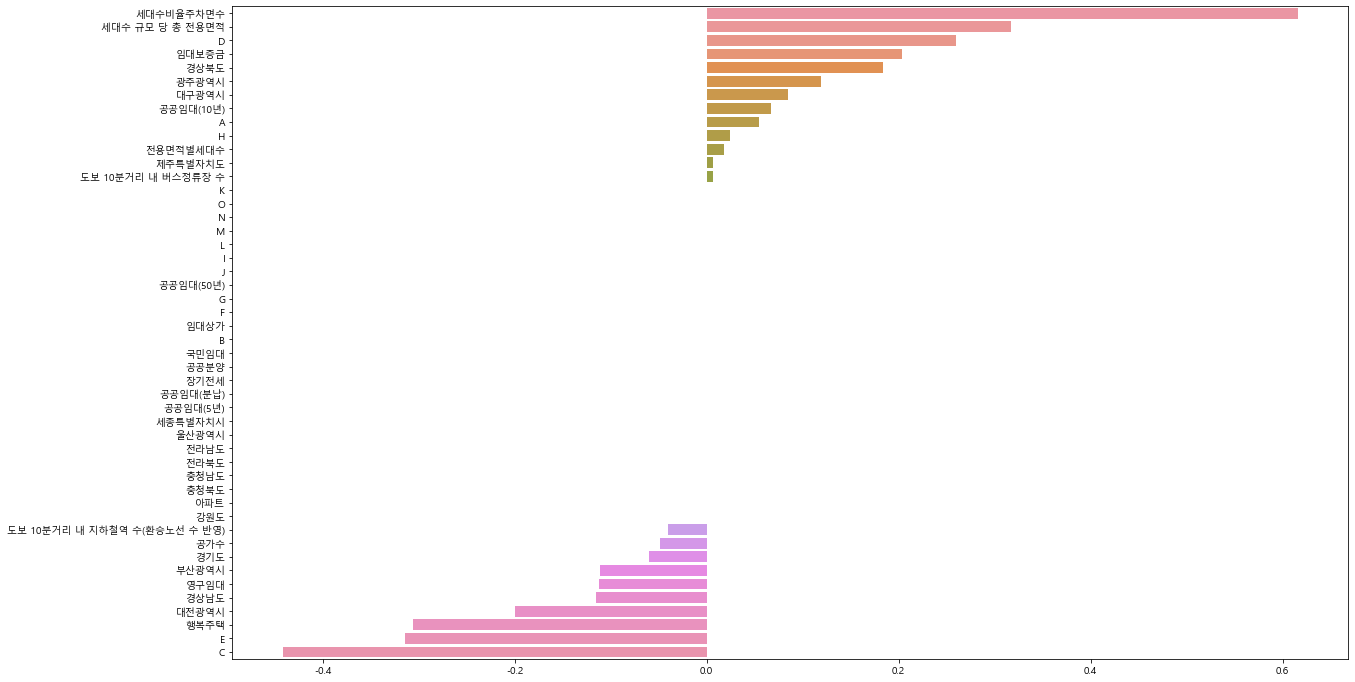

In [115]:
importance = lasso_grid.best_estimator_.coef_
feature_importance = pd.Series(data=importance, index=X_train_df_log.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(20, 12))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

In [116]:
lasso_best = lasso_grid.best_estimator_


X_train, X_test, y_train, y_test = train_test_split(X_train_df_log, y_train_df_log, test_size=0.25,
                                                    random_state=42)

pred = lasso_best.predict(X_test)
mean_absolute_error(np.expm1(y_test), np.expm1(pred))

14.743851050751413

### Ridge & Lasso & CatBoost 조합 -> 0.2 & 0.2 & 0.6 조합

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df_log, y_train_df_log, test_size=0.25,
                                                    random_state=42)

ridge_model = Ridge(alpha=30)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(X_train, y_train)
cat_pred = cat_reg.predict(X_test)

linear_model_pred = (ridge_pred * 0.5) + (lasso_pred * 0.5)
final_pred = (linear_model_pred * 0.4) + (cat_pred * 0.6)

mean_absolute_error(np.expm1(y_test), np.expm1(final_pred))

Learning rate set to 0.04469
0:	learn: 1.7660153	total: 5.85ms	remaining: 5.84s
1:	learn: 1.6939579	total: 12.4ms	remaining: 6.19s
2:	learn: 1.6270559	total: 15.9ms	remaining: 5.3s
3:	learn: 1.5630121	total: 19.1ms	remaining: 4.75s
4:	learn: 1.4996392	total: 22.8ms	remaining: 4.53s
5:	learn: 1.4397555	total: 26ms	remaining: 4.31s
6:	learn: 1.3823125	total: 29.3ms	remaining: 4.16s
7:	learn: 1.3266946	total: 32.8ms	remaining: 4.06s
8:	learn: 1.2751619	total: 36.1ms	remaining: 3.97s
9:	learn: 1.2257300	total: 39.2ms	remaining: 3.88s
10:	learn: 1.1793590	total: 42.9ms	remaining: 3.85s
11:	learn: 1.1361100	total: 46.1ms	remaining: 3.8s
12:	learn: 1.0919931	total: 49.9ms	remaining: 3.79s
13:	learn: 1.0510757	total: 53.1ms	remaining: 3.74s
14:	learn: 1.0102971	total: 56.5ms	remaining: 3.71s
15:	learn: 0.9712882	total: 59.7ms	remaining: 3.67s
16:	learn: 0.9344677	total: 62.9ms	remaining: 3.63s
17:	learn: 0.8992607	total: 66.7ms	remaining: 3.64s
18:	learn: 0.8657534	total: 70.2ms	remaining: 3.6

162:	learn: 0.2140884	total: 646ms	remaining: 3.32s
163:	learn: 0.2138358	total: 650ms	remaining: 3.31s
164:	learn: 0.2132981	total: 654ms	remaining: 3.31s
165:	learn: 0.2129830	total: 658ms	remaining: 3.31s
166:	learn: 0.2127254	total: 662ms	remaining: 3.3s
167:	learn: 0.2123622	total: 666ms	remaining: 3.3s
168:	learn: 0.2116258	total: 672ms	remaining: 3.3s
169:	learn: 0.2111094	total: 679ms	remaining: 3.32s
170:	learn: 0.2107636	total: 684ms	remaining: 3.31s
171:	learn: 0.2103980	total: 688ms	remaining: 3.31s
172:	learn: 0.2102665	total: 697ms	remaining: 3.33s
173:	learn: 0.2100544	total: 710ms	remaining: 3.37s
174:	learn: 0.2097976	total: 714ms	remaining: 3.37s
175:	learn: 0.2094967	total: 722ms	remaining: 3.38s
176:	learn: 0.2092703	total: 726ms	remaining: 3.37s
177:	learn: 0.2090004	total: 732ms	remaining: 3.38s
178:	learn: 0.2085603	total: 737ms	remaining: 3.38s
179:	learn: 0.2083900	total: 741ms	remaining: 3.38s
180:	learn: 0.2082915	total: 747ms	remaining: 3.38s
181:	learn: 0.2

336:	learn: 0.1724076	total: 1.47s	remaining: 2.89s
337:	learn: 0.1719373	total: 1.47s	remaining: 2.88s
338:	learn: 0.1716583	total: 1.48s	remaining: 2.89s
339:	learn: 0.1714786	total: 1.49s	remaining: 2.88s
340:	learn: 0.1713067	total: 1.49s	remaining: 2.89s
341:	learn: 0.1711211	total: 1.5s	remaining: 2.88s
342:	learn: 0.1706851	total: 1.5s	remaining: 2.88s
343:	learn: 0.1704365	total: 1.51s	remaining: 2.88s
344:	learn: 0.1703842	total: 1.52s	remaining: 2.88s
345:	learn: 0.1700630	total: 1.52s	remaining: 2.87s
346:	learn: 0.1697608	total: 1.53s	remaining: 2.88s
347:	learn: 0.1695684	total: 1.53s	remaining: 2.87s
348:	learn: 0.1694019	total: 1.53s	remaining: 2.86s
349:	learn: 0.1693464	total: 1.54s	remaining: 2.86s
350:	learn: 0.1691099	total: 1.54s	remaining: 2.85s
351:	learn: 0.1688972	total: 1.55s	remaining: 2.85s
352:	learn: 0.1687364	total: 1.55s	remaining: 2.84s
353:	learn: 0.1685886	total: 1.55s	remaining: 2.84s
354:	learn: 0.1683551	total: 1.56s	remaining: 2.83s
355:	learn: 0.

518:	learn: 0.1430959	total: 2.29s	remaining: 2.12s
519:	learn: 0.1429548	total: 2.29s	remaining: 2.12s
520:	learn: 0.1428823	total: 2.3s	remaining: 2.12s
521:	learn: 0.1427010	total: 2.3s	remaining: 2.11s
522:	learn: 0.1426910	total: 2.31s	remaining: 2.1s
523:	learn: 0.1425176	total: 2.31s	remaining: 2.1s
524:	learn: 0.1423912	total: 2.32s	remaining: 2.1s
525:	learn: 0.1423026	total: 2.32s	remaining: 2.09s
526:	learn: 0.1421708	total: 2.33s	remaining: 2.09s
527:	learn: 0.1420479	total: 2.33s	remaining: 2.08s
528:	learn: 0.1418912	total: 2.34s	remaining: 2.08s
529:	learn: 0.1418083	total: 2.34s	remaining: 2.08s
530:	learn: 0.1416932	total: 2.35s	remaining: 2.07s
531:	learn: 0.1416600	total: 2.35s	remaining: 2.07s
532:	learn: 0.1413986	total: 2.35s	remaining: 2.06s
533:	learn: 0.1412632	total: 2.36s	remaining: 2.06s
534:	learn: 0.1412490	total: 2.36s	remaining: 2.05s
535:	learn: 0.1411168	total: 2.37s	remaining: 2.05s
536:	learn: 0.1410641	total: 2.37s	remaining: 2.04s
537:	learn: 0.140

689:	learn: 0.1233422	total: 3.11s	remaining: 1.4s
690:	learn: 0.1232759	total: 3.12s	remaining: 1.39s
691:	learn: 0.1232403	total: 3.12s	remaining: 1.39s
692:	learn: 0.1231800	total: 3.13s	remaining: 1.39s
693:	learn: 0.1230637	total: 3.13s	remaining: 1.38s
694:	learn: 0.1230051	total: 3.14s	remaining: 1.38s
695:	learn: 0.1228513	total: 3.14s	remaining: 1.37s
696:	learn: 0.1227409	total: 3.15s	remaining: 1.37s
697:	learn: 0.1226568	total: 3.16s	remaining: 1.36s
698:	learn: 0.1225413	total: 3.16s	remaining: 1.36s
699:	learn: 0.1224744	total: 3.17s	remaining: 1.36s
700:	learn: 0.1224162	total: 3.17s	remaining: 1.35s
701:	learn: 0.1223490	total: 3.18s	remaining: 1.35s
702:	learn: 0.1221318	total: 3.18s	remaining: 1.34s
703:	learn: 0.1220552	total: 3.19s	remaining: 1.34s
704:	learn: 0.1219145	total: 3.19s	remaining: 1.33s
705:	learn: 0.1218806	total: 3.19s	remaining: 1.33s
706:	learn: 0.1218117	total: 3.2s	remaining: 1.32s
707:	learn: 0.1216923	total: 3.2s	remaining: 1.32s
708:	learn: 0.1

855:	learn: 0.1074339	total: 3.94s	remaining: 662ms
856:	learn: 0.1073849	total: 3.94s	remaining: 658ms
857:	learn: 0.1073336	total: 3.94s	remaining: 653ms
858:	learn: 0.1072779	total: 3.95s	remaining: 649ms
859:	learn: 0.1072338	total: 3.96s	remaining: 644ms
860:	learn: 0.1071206	total: 3.96s	remaining: 639ms
861:	learn: 0.1070015	total: 3.97s	remaining: 635ms
862:	learn: 0.1069102	total: 3.97s	remaining: 631ms
863:	learn: 0.1068223	total: 3.98s	remaining: 627ms
864:	learn: 0.1066930	total: 3.99s	remaining: 622ms
865:	learn: 0.1066175	total: 3.99s	remaining: 618ms
866:	learn: 0.1065555	total: 4s	remaining: 613ms
867:	learn: 0.1065014	total: 4s	remaining: 608ms
868:	learn: 0.1064448	total: 4s	remaining: 604ms
869:	learn: 0.1063450	total: 4.01s	remaining: 599ms
870:	learn: 0.1062713	total: 4.01s	remaining: 594ms
871:	learn: 0.1061829	total: 4.01s	remaining: 589ms
872:	learn: 0.1060991	total: 4.02s	remaining: 585ms
873:	learn: 0.1059946	total: 4.02s	remaining: 580ms
874:	learn: 0.1059361

10.823021623086866

In [118]:
ridge_model = Ridge(alpha=30)
ridge_model.fit(X_train_df_log, y_train_df_log)
ridge_pred = ridge_model.predict(X_test_df_log)

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_df_log, y_train_df_log)
lasso_pred = lasso_model.predict(X_test_df_log)

cat_reg = CatBoostRegressor(random_seed=42)
cat_reg.fit(X_train_df_log, y_train_df_log)
cat_pred = cat_reg.predict(X_test_df_log)

linear_model_pred = (ridge_pred * 0.5) + (lasso_pred * 0.5)
final_pred = (linear_model_pred * 0.4) + (cat_pred * 0.6)
final_pred = np.expm1(final_pred)

result = pd.DataFrame(data=final_pred, columns=["전용면적 당 차량등록수"], index=test_df.index)
result["단지코드"] = test_df.loc[test_df.index, "단지코드"]

pred_group = result.groupby("단지코드")["전용면적 당 차량등록수"].sum()
final_pred = pd.Series(pred_group)
final_pred = final_pred.reset_index(drop=False)

sub_df = sub.merge(final_pred, how="left")
sub_df = sub_df.drop_duplicates(["단지코드"], keep="first").reset_index()
sub_df = sub_df[["단지코드", "전용면적 당 차량등록수"]]
sub_df = sub_df.rename(columns={"단지코드":"code", "전용면적 당 차량등록수": "num"})
sub_df.to_csv("ridge(0.2) & lasso(0.2)& catboost(0.6)조합_공급유형추가_임대보증금예측값적용_0728.csv", index=False)

sub_df

Learning rate set to 0.04704
0:	learn: 1.7676638	total: 3.66ms	remaining: 3.66s
1:	learn: 1.6932903	total: 6.99ms	remaining: 3.49s
2:	learn: 1.6217559	total: 10.3ms	remaining: 3.42s
3:	learn: 1.5530860	total: 13.9ms	remaining: 3.45s
4:	learn: 1.4871545	total: 17.2ms	remaining: 3.42s
5:	learn: 1.4250644	total: 20.5ms	remaining: 3.39s
6:	learn: 1.3651551	total: 23.9ms	remaining: 3.38s
7:	learn: 1.3099859	total: 25.8ms	remaining: 3.2s
8:	learn: 1.2567135	total: 29.5ms	remaining: 3.25s
9:	learn: 1.2053241	total: 33.2ms	remaining: 3.29s
10:	learn: 1.1561144	total: 36.6ms	remaining: 3.29s
11:	learn: 1.1085535	total: 40ms	remaining: 3.29s
12:	learn: 1.0651810	total: 43.1ms	remaining: 3.27s
13:	learn: 1.0230843	total: 46.6ms	remaining: 3.28s
14:	learn: 0.9826531	total: 50ms	remaining: 3.28s
15:	learn: 0.9440812	total: 53.3ms	remaining: 3.27s
16:	learn: 0.9082635	total: 56.6ms	remaining: 3.27s
17:	learn: 0.8740238	total: 59.9ms	remaining: 3.27s
18:	learn: 0.8399272	total: 63.3ms	remaining: 3.27

201:	learn: 0.2086179	total: 805ms	remaining: 3.18s
202:	learn: 0.2083276	total: 808ms	remaining: 3.17s
203:	learn: 0.2082178	total: 812ms	remaining: 3.17s
204:	learn: 0.2078905	total: 816ms	remaining: 3.16s
205:	learn: 0.2076746	total: 820ms	remaining: 3.16s
206:	learn: 0.2072831	total: 824ms	remaining: 3.15s
207:	learn: 0.2069806	total: 828ms	remaining: 3.15s
208:	learn: 0.2067295	total: 831ms	remaining: 3.15s
209:	learn: 0.2063673	total: 835ms	remaining: 3.14s
210:	learn: 0.2062147	total: 839ms	remaining: 3.14s
211:	learn: 0.2059532	total: 843ms	remaining: 3.13s
212:	learn: 0.2054636	total: 847ms	remaining: 3.13s
213:	learn: 0.2052631	total: 851ms	remaining: 3.13s
214:	learn: 0.2047692	total: 855ms	remaining: 3.12s
215:	learn: 0.2042569	total: 860ms	remaining: 3.12s
216:	learn: 0.2038735	total: 863ms	remaining: 3.11s
217:	learn: 0.2035612	total: 866ms	remaining: 3.1s
218:	learn: 0.2034366	total: 870ms	remaining: 3.1s
219:	learn: 0.2032118	total: 874ms	remaining: 3.1s
220:	learn: 0.2

387:	learn: 0.1661797	total: 1.62s	remaining: 2.55s
388:	learn: 0.1661164	total: 1.62s	remaining: 2.55s
389:	learn: 0.1659359	total: 1.63s	remaining: 2.54s
390:	learn: 0.1657407	total: 1.63s	remaining: 2.54s
391:	learn: 0.1654766	total: 1.63s	remaining: 2.53s
392:	learn: 0.1653130	total: 1.64s	remaining: 2.53s
393:	learn: 0.1651478	total: 1.64s	remaining: 2.53s
394:	learn: 0.1648774	total: 1.65s	remaining: 2.53s
395:	learn: 0.1645766	total: 1.66s	remaining: 2.53s
396:	learn: 0.1644061	total: 1.66s	remaining: 2.52s
397:	learn: 0.1642052	total: 1.67s	remaining: 2.52s
398:	learn: 0.1639095	total: 1.67s	remaining: 2.52s
399:	learn: 0.1637562	total: 1.68s	remaining: 2.52s
400:	learn: 0.1635509	total: 1.69s	remaining: 2.52s
401:	learn: 0.1635084	total: 1.69s	remaining: 2.51s
402:	learn: 0.1633048	total: 1.69s	remaining: 2.51s
403:	learn: 0.1630868	total: 1.7s	remaining: 2.51s
404:	learn: 0.1629143	total: 1.7s	remaining: 2.5s
405:	learn: 0.1628412	total: 1.71s	remaining: 2.5s
406:	learn: 0.16

568:	learn: 0.1374972	total: 2.44s	remaining: 1.85s
569:	learn: 0.1374065	total: 2.45s	remaining: 1.85s
570:	learn: 0.1372355	total: 2.45s	remaining: 1.84s
571:	learn: 0.1371380	total: 2.46s	remaining: 1.84s
572:	learn: 0.1370305	total: 2.46s	remaining: 1.83s
573:	learn: 0.1369178	total: 2.46s	remaining: 1.83s
574:	learn: 0.1366508	total: 2.47s	remaining: 1.82s
575:	learn: 0.1363590	total: 2.48s	remaining: 1.82s
576:	learn: 0.1361916	total: 2.48s	remaining: 1.82s
577:	learn: 0.1361160	total: 2.48s	remaining: 1.81s
578:	learn: 0.1360250	total: 2.49s	remaining: 1.81s
579:	learn: 0.1359598	total: 2.49s	remaining: 1.8s
580:	learn: 0.1358542	total: 2.5s	remaining: 1.8s
581:	learn: 0.1358006	total: 2.5s	remaining: 1.79s
582:	learn: 0.1356483	total: 2.5s	remaining: 1.79s
583:	learn: 0.1355225	total: 2.5s	remaining: 1.78s
584:	learn: 0.1353947	total: 2.51s	remaining: 1.78s
585:	learn: 0.1352624	total: 2.51s	remaining: 1.77s
586:	learn: 0.1351532	total: 2.52s	remaining: 1.77s
587:	learn: 0.1350

756:	learn: 0.1169713	total: 3.27s	remaining: 1.05s
757:	learn: 0.1169485	total: 3.27s	remaining: 1.04s
758:	learn: 0.1168188	total: 3.28s	remaining: 1.04s
759:	learn: 0.1167210	total: 3.28s	remaining: 1.04s
760:	learn: 0.1166589	total: 3.29s	remaining: 1.03s
761:	learn: 0.1165825	total: 3.29s	remaining: 1.03s
762:	learn: 0.1164741	total: 3.3s	remaining: 1.02s
763:	learn: 0.1163438	total: 3.31s	remaining: 1.02s
764:	learn: 0.1162889	total: 3.31s	remaining: 1.02s
765:	learn: 0.1161828	total: 3.32s	remaining: 1.01s
766:	learn: 0.1161308	total: 3.33s	remaining: 1.01s
767:	learn: 0.1160034	total: 3.33s	remaining: 1.01s
768:	learn: 0.1159328	total: 3.34s	remaining: 1s
769:	learn: 0.1158667	total: 3.34s	remaining: 998ms
770:	learn: 0.1156748	total: 3.34s	remaining: 993ms
771:	learn: 0.1155676	total: 3.35s	remaining: 989ms
772:	learn: 0.1154409	total: 3.35s	remaining: 985ms
773:	learn: 0.1153737	total: 3.36s	remaining: 980ms
774:	learn: 0.1152896	total: 3.36s	remaining: 976ms
775:	learn: 0.11

946:	learn: 0.1024549	total: 4.09s	remaining: 229ms
947:	learn: 0.1024020	total: 4.09s	remaining: 225ms
948:	learn: 0.1023715	total: 4.1s	remaining: 220ms
949:	learn: 0.1023422	total: 4.11s	remaining: 216ms
950:	learn: 0.1022683	total: 4.11s	remaining: 212ms
951:	learn: 0.1022180	total: 4.12s	remaining: 208ms
952:	learn: 0.1020631	total: 4.12s	remaining: 203ms
953:	learn: 0.1020291	total: 4.13s	remaining: 199ms
954:	learn: 0.1020015	total: 4.13s	remaining: 195ms
955:	learn: 0.1019465	total: 4.14s	remaining: 190ms
956:	learn: 0.1018140	total: 4.14s	remaining: 186ms
957:	learn: 0.1017522	total: 4.15s	remaining: 182ms
958:	learn: 0.1017287	total: 4.16s	remaining: 178ms
959:	learn: 0.1017133	total: 4.16s	remaining: 173ms
960:	learn: 0.1016613	total: 4.17s	remaining: 169ms
961:	learn: 0.1015584	total: 4.17s	remaining: 165ms
962:	learn: 0.1015185	total: 4.17s	remaining: 160ms
963:	learn: 0.1014869	total: 4.18s	remaining: 156ms
964:	learn: 0.1014515	total: 4.18s	remaining: 152ms
965:	learn: 0

,code,num
0,C1072,717.767977
1,C1128,1319.041097
2,C1456,497.573825
3,C1840,472.763693
4,C1332,1194.755624
...,...,...
145,C2456,237.583889
146,C1266,416.933881
147,C2152,25.905798
148,C1267,340.605408
